In [7]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import os
import random

In [8]:
#cela retourne un tableau de sampling rate(frequences d'echantillanages) et de audio time series
def read_folder(source="C:/Users/ECC/Desktop/2024/PLDAC/mini_speech_commands", limit = 5):
    res = []
    if os.path.exists(source) and os.path.isdir(source):
        sub_dirs = os.listdir(source)
        for dir in sub_dirs:
            dir_path = os.path.join(source, dir)
            files = os.listdir(dir_path)
            for index, file in enumerate(files):
                file_path =  os.path.join(dir_path, file)
                res.append({
                    'signal' : librosa.load(file_path),
                    'label' : dir
                })

                if (index > limit):
                    break

    return res
       

In [9]:
read_folder()

[{'signal': (array([-0.00374849, -0.00438129, -0.00390064, ..., -0.00539248,
          -0.00740268, -0.00514487], dtype=float32),
   22050),
  'label': 'down'},
 {'signal': (array([ 0.00154396,  0.0018529 ,  0.00136606, ..., -0.00442312,
          -0.00583863, -0.0041766 ], dtype=float32),
   22050),
  'label': 'down'},
 {'signal': (array([0.00058693, 0.000897  , 0.00078569, ..., 0.00053047, 0.00087852,
          0.00061928], dtype=float32),
   22050),
  'label': 'down'},
 {'signal': (array([ 0.0001457 ,  0.00017056,  0.00011841, ..., -0.00019593,
          -0.00017252, -0.00011496], dtype=float32),
   22050),
  'label': 'down'},
 {'signal': (array([-8.7666565e-05, -1.8224838e-04, -2.6097029e-04, ...,
           2.1365896e-04,  3.5234689e-04,  2.5422985e-04], dtype=float32),
   22050),
  'label': 'down'},
 {'signal': (array([6.9437192e-08, 1.7047038e-05, 5.2840034e-05, ..., 5.5793204e-05,
          7.1811264e-05, 4.4324333e-05], dtype=float32),
   22050),
  'label': 'down'},
 {'signal'

In [10]:
def plot_signal(ax, data):
    signal, frequence = data['signal']
    #generation du temps
    time = np.arange(len(signal)) / frequence
    ax.plot(time, signal, color='b')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_title(data['label'])


In [13]:
def show(data, y_axis='log'):    
    window_type = 'ham' # fenetrage : w(n) = 0.54 - 0.46 * cos(2πn / (N - 1)), N est la longeur de la fenetre
    frame_length = 512
    hop_length = 128 # 25 %  of frame_length
    padding_lenght = 100 # ajout du padding au debut du signal pour l'amélioration de la résolution fréquentielle

    y, fr = data['signal']
    
    #ajout du padding au signal
    padded_y = np.concatenate((np.zeros(padding_lenght), y))

    #calcul de la STFT
    S = librosa.stft(padded_y, n_fft=frame_length, hop_length=hop_length, window=window_type)
    S_abs = np.abs(S)

    S_db = librosa.amplitude_to_db(S_abs, ref=np.max)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    plot_signal(axs[0], data)
    
    librosa.display.specshow(S_db, sr=fr, x_axis='time', y_axis=y_axis)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Amplitude')
    axs[1].set_title('spectrogram')

    
    plt.tight_layout()
    plt.show()


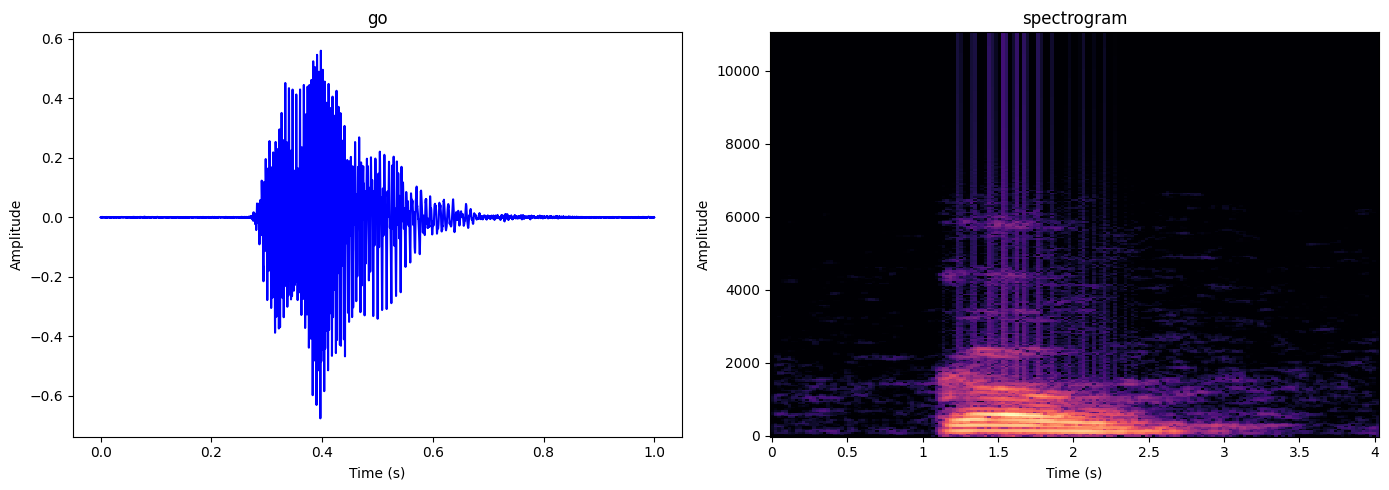

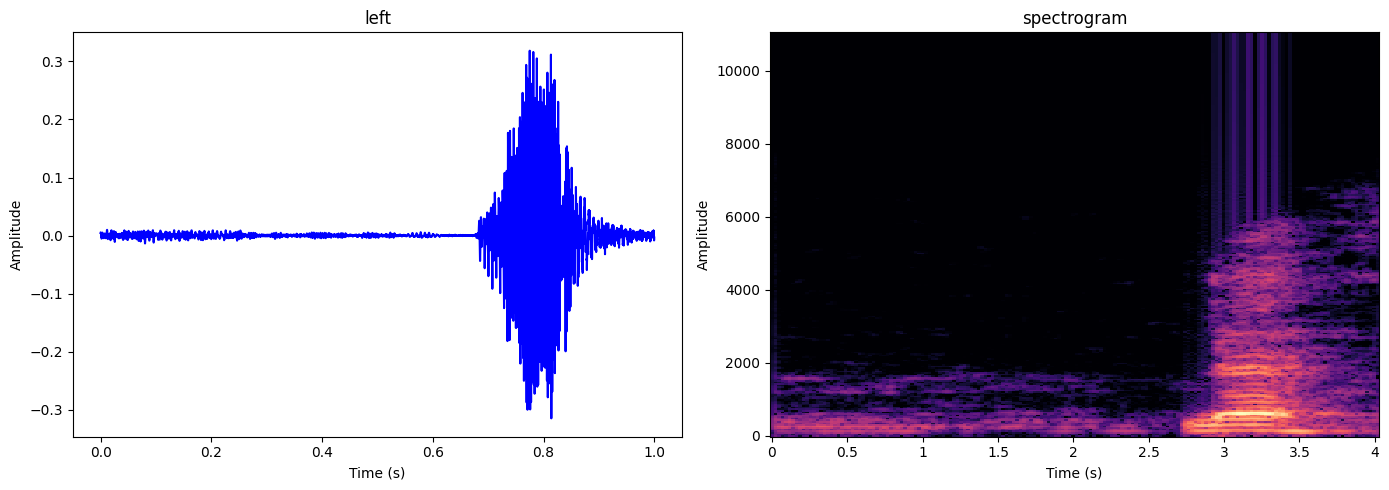

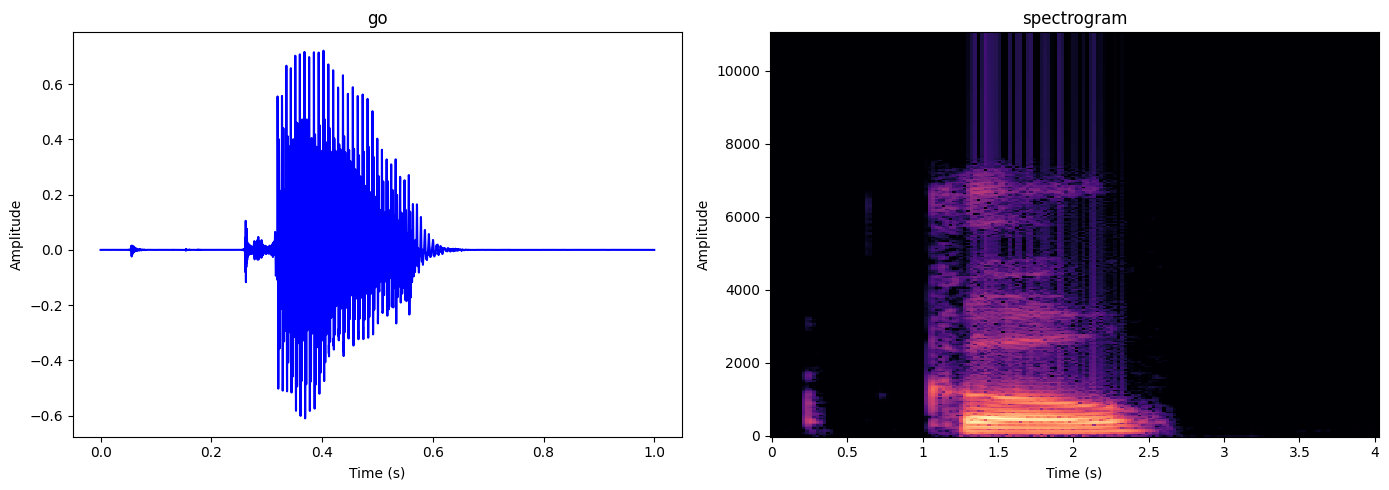

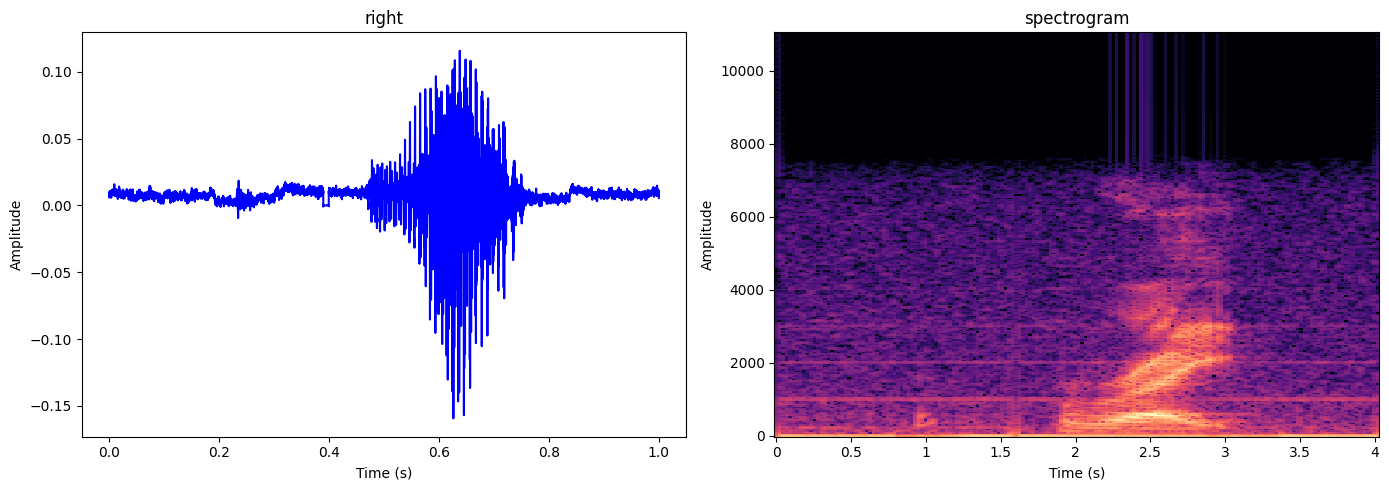

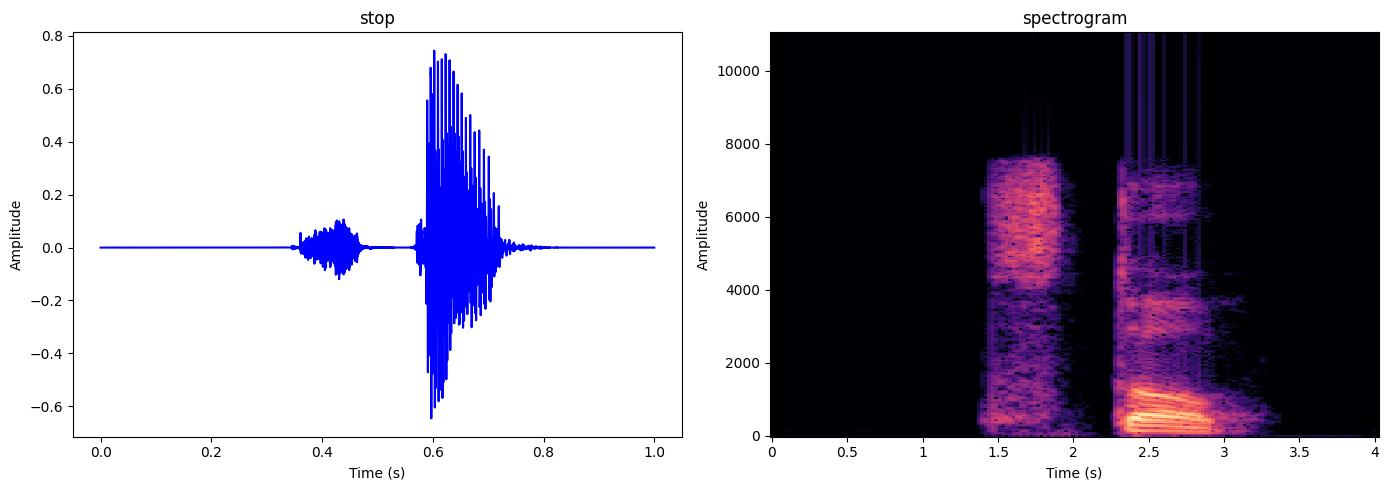

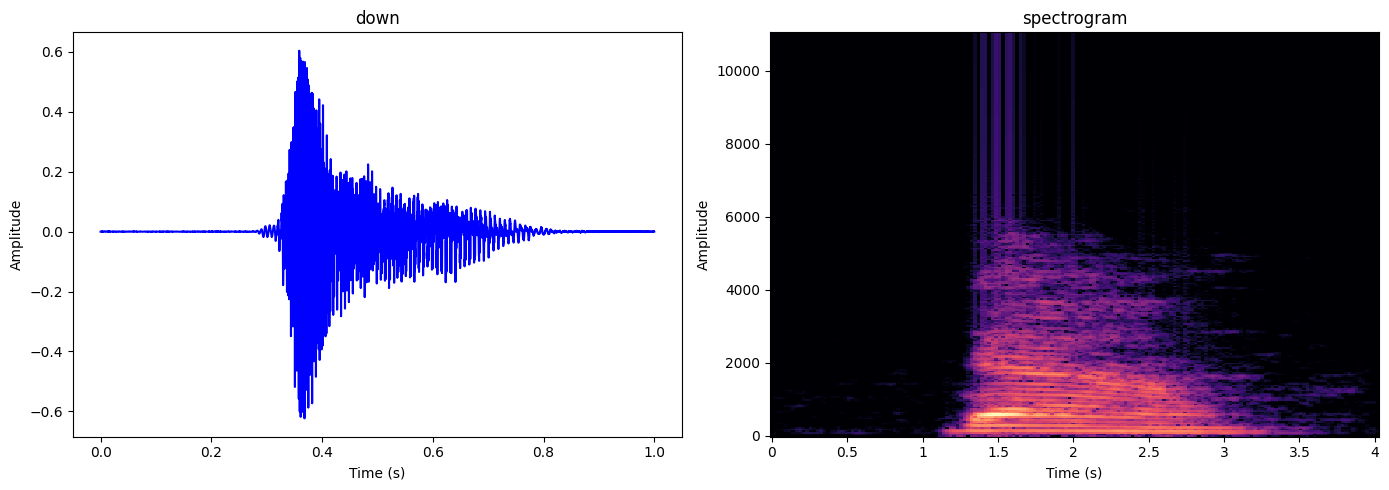

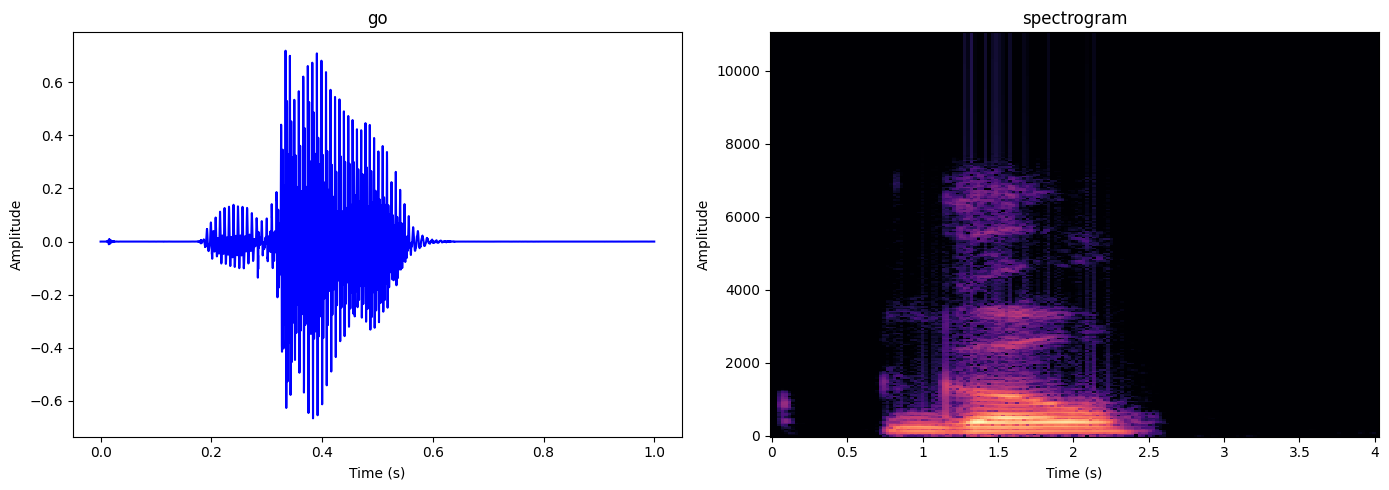

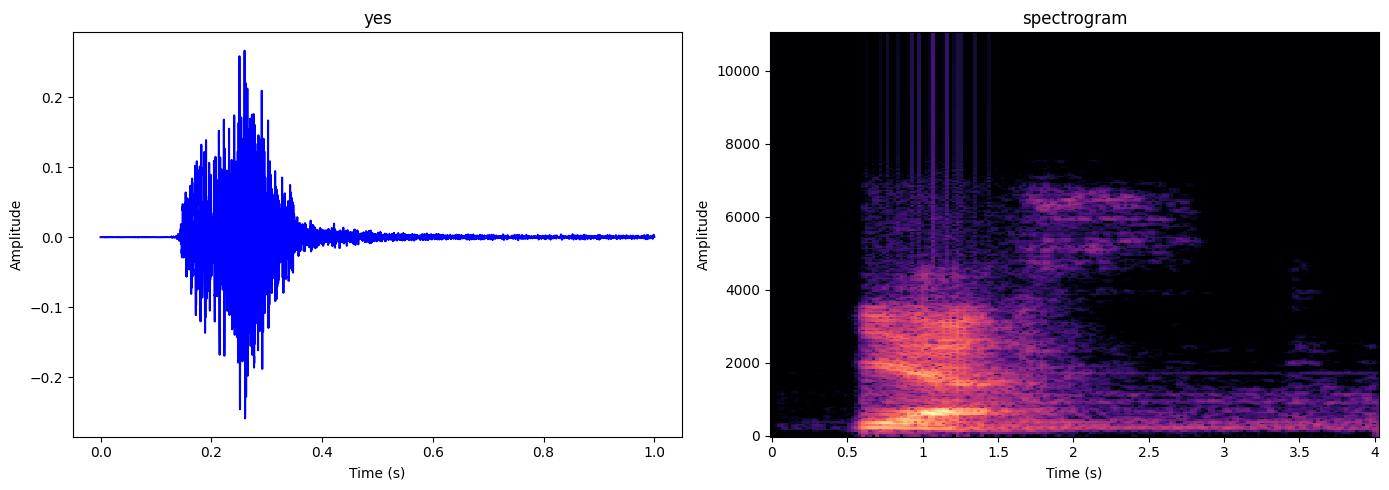

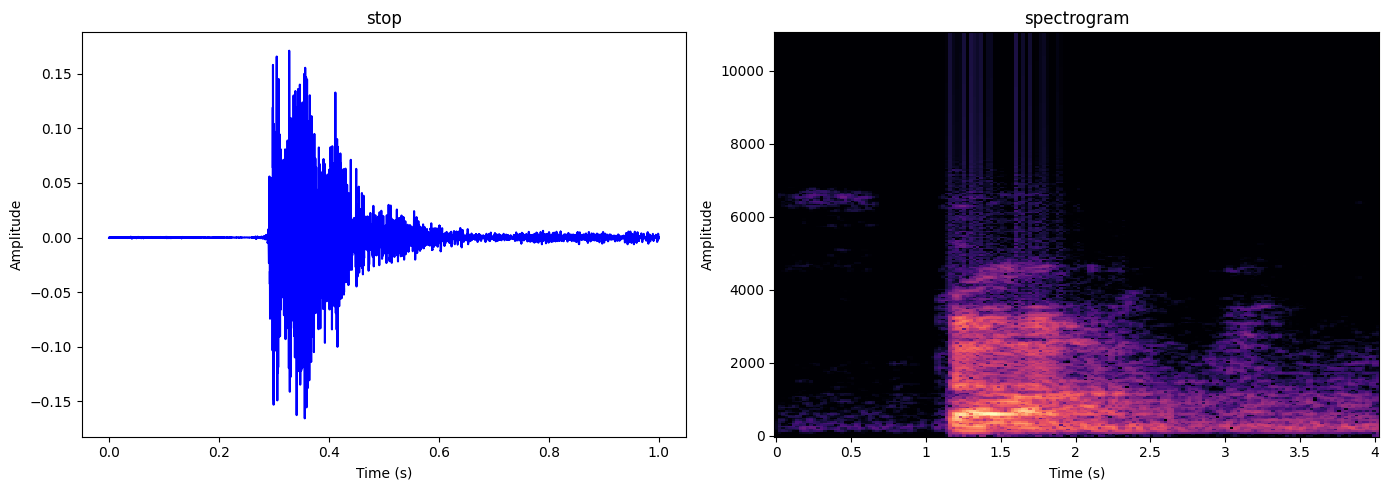

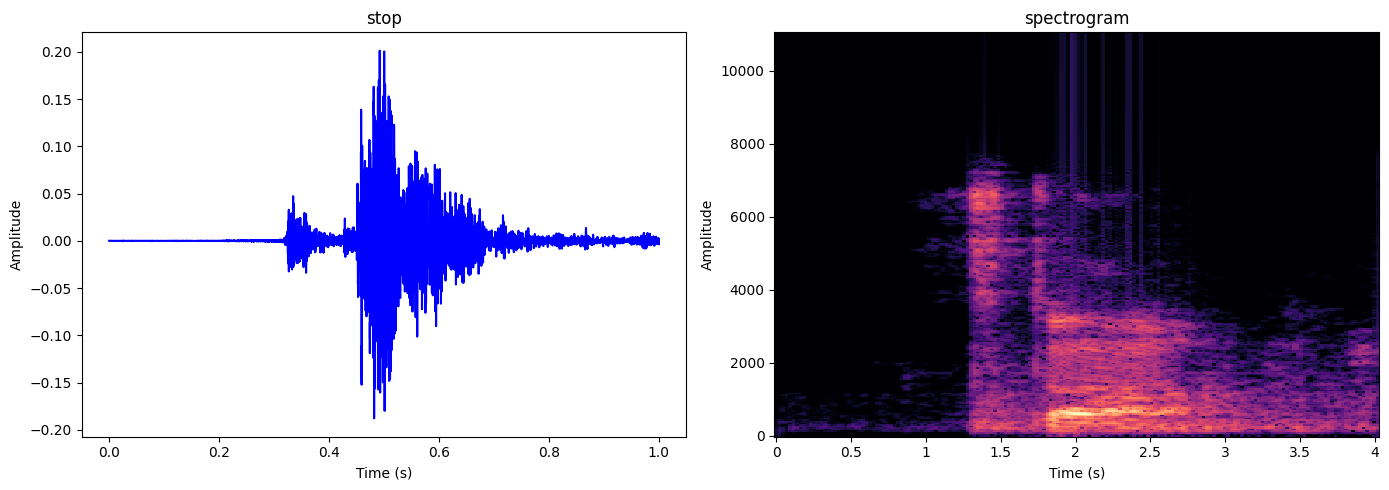

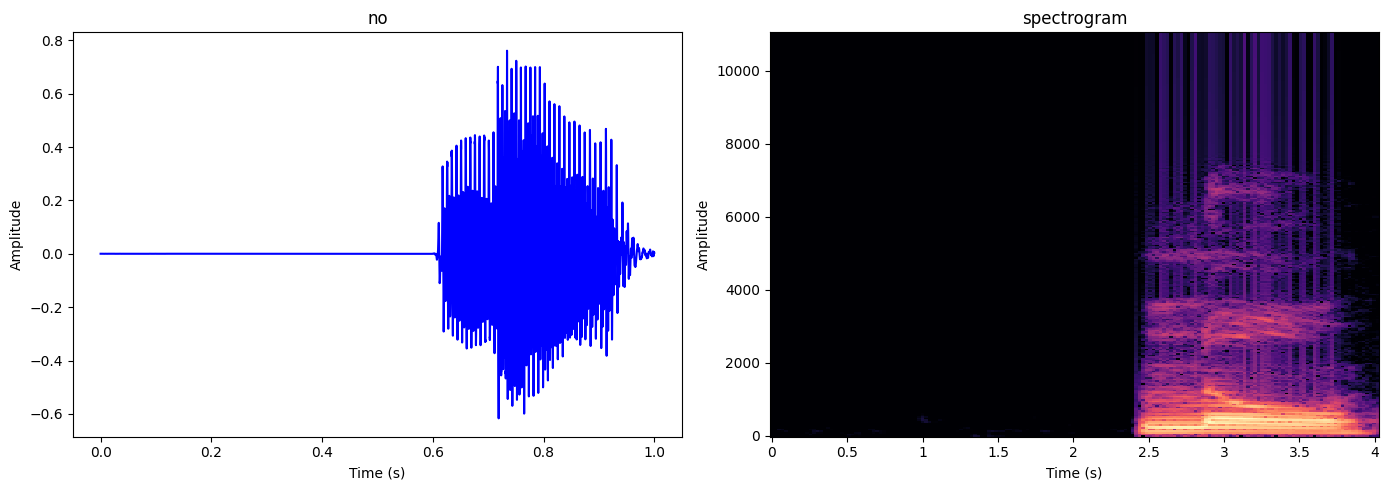

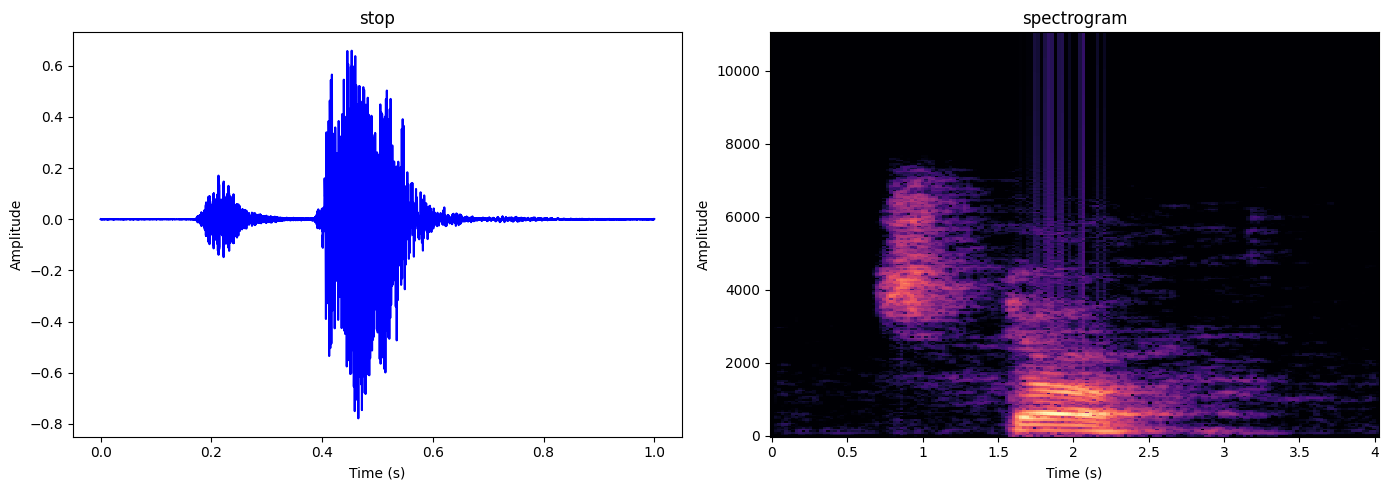

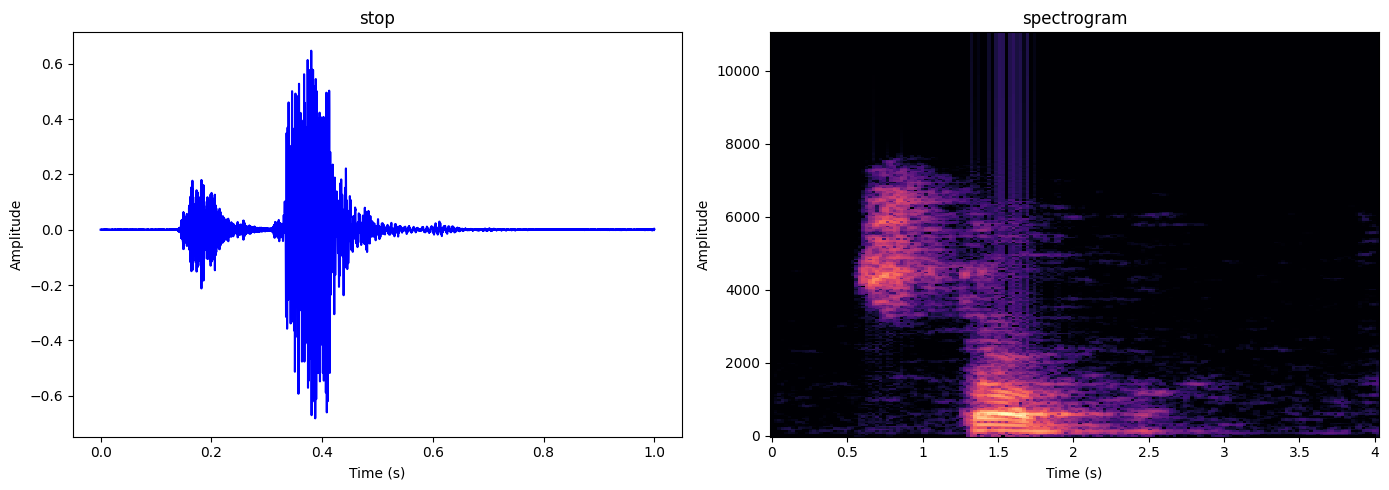

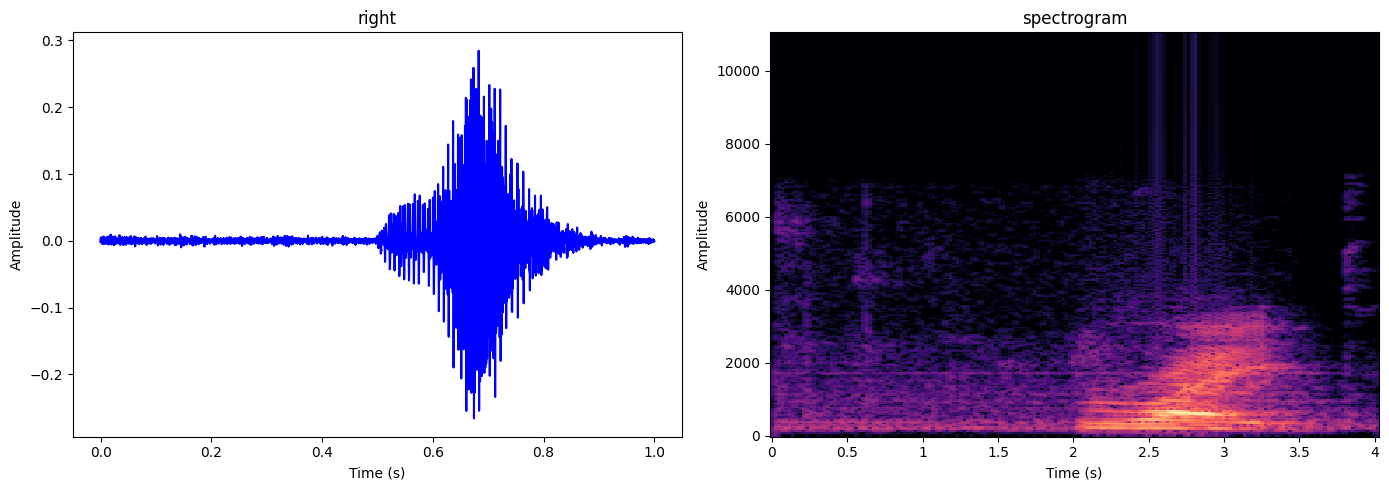

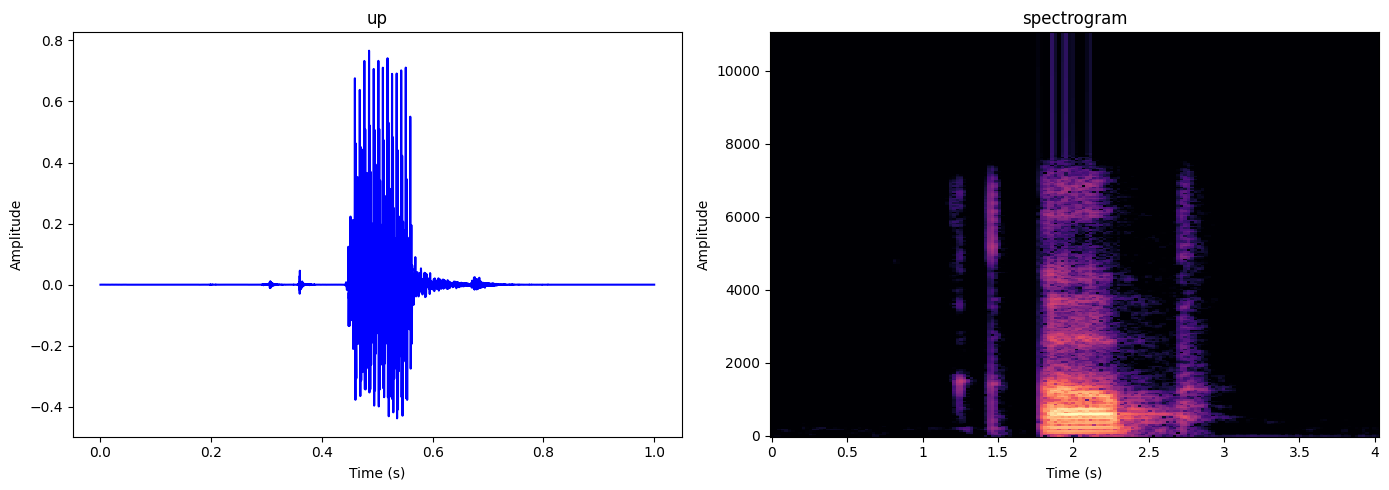

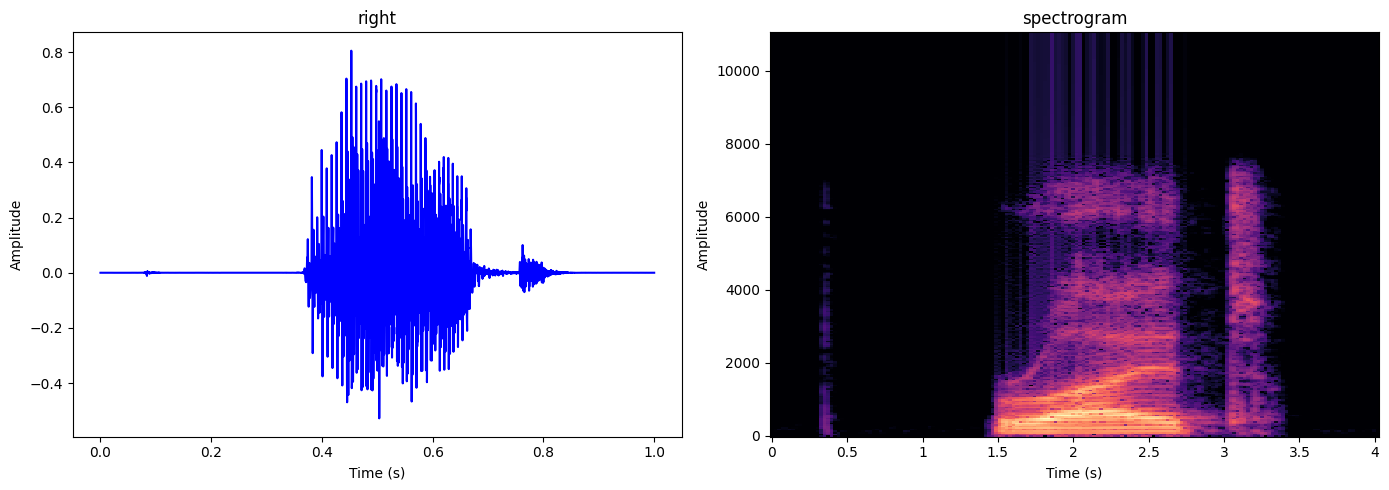

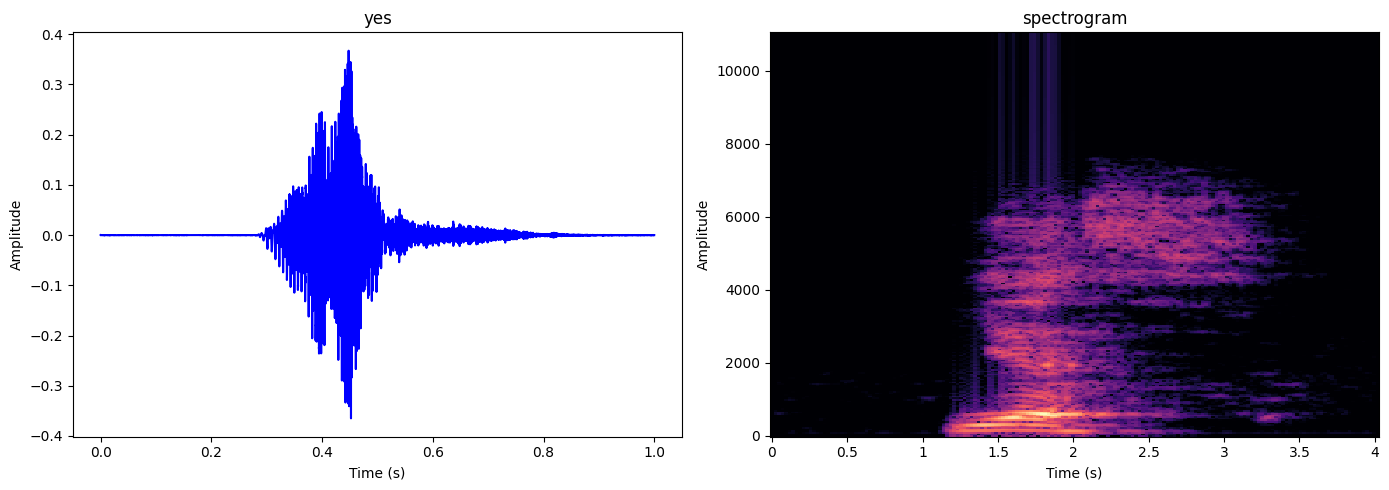

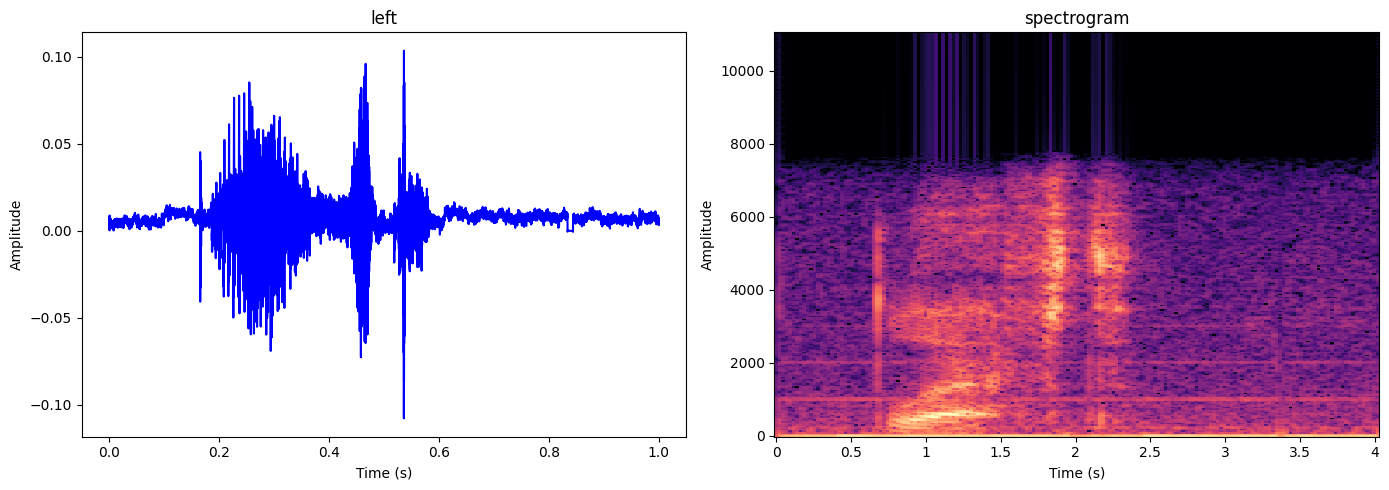

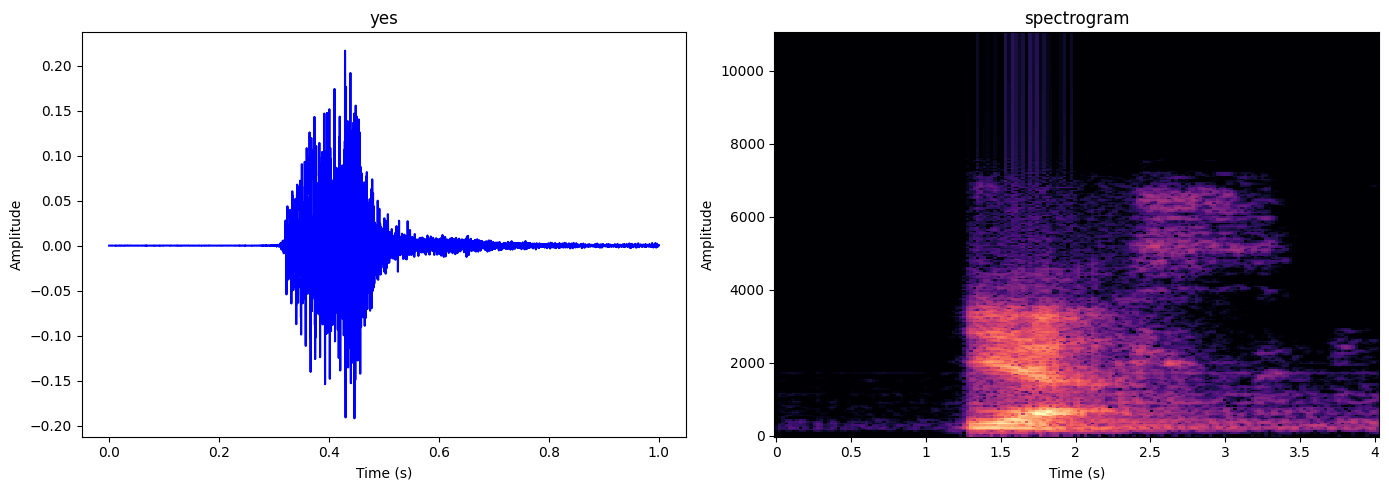

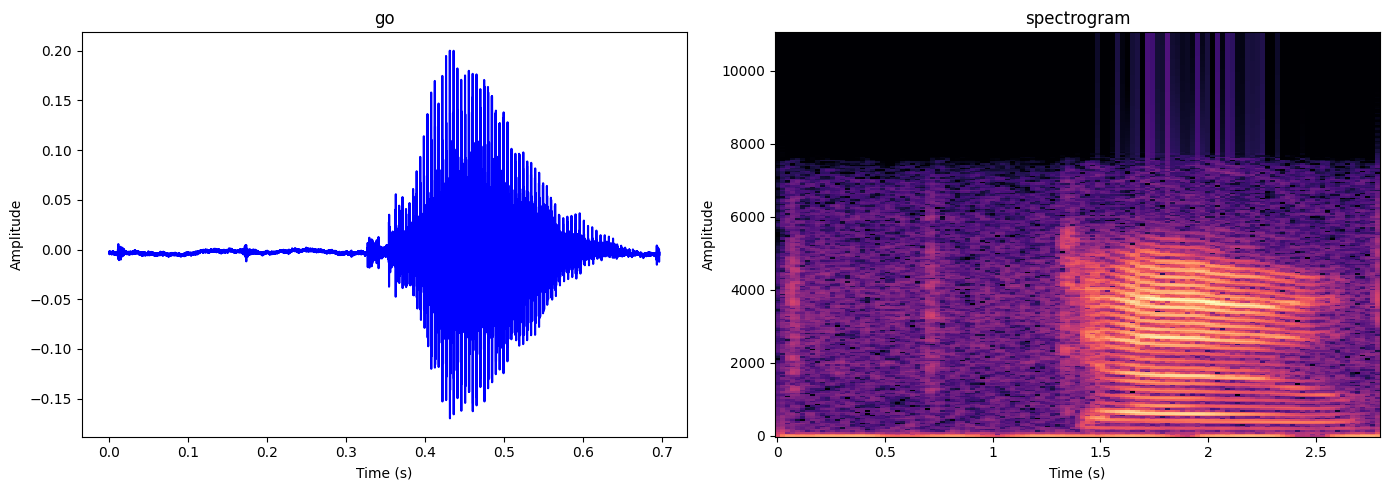

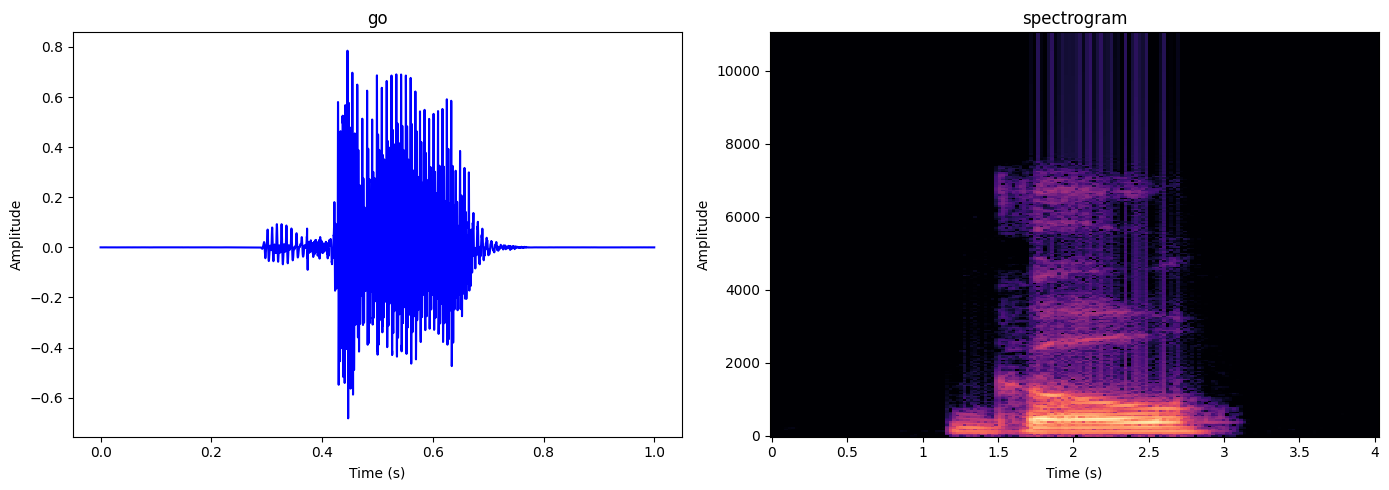

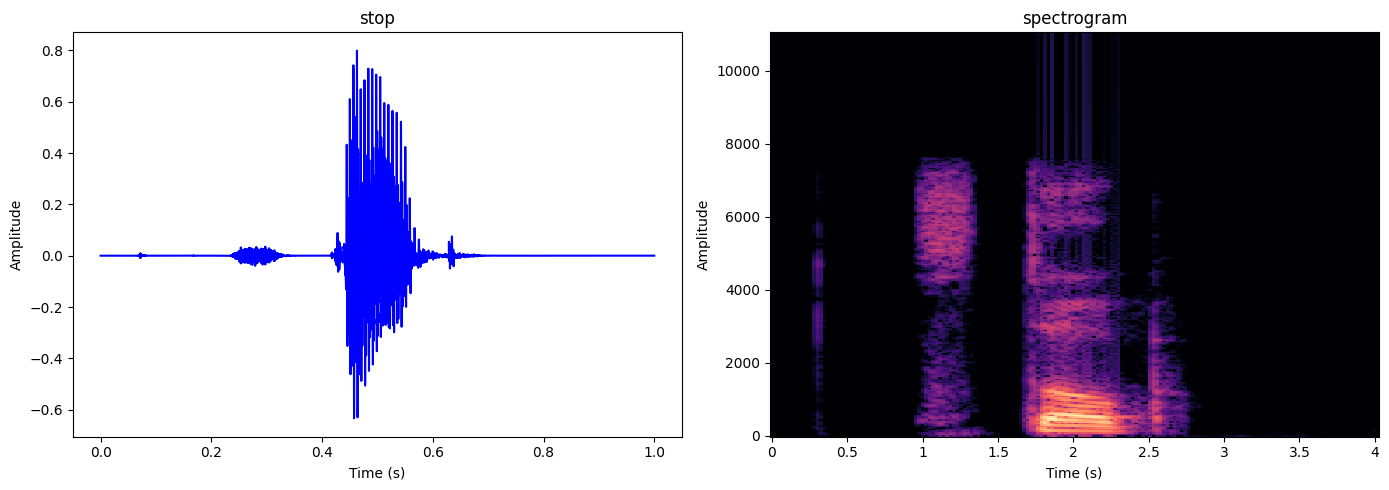

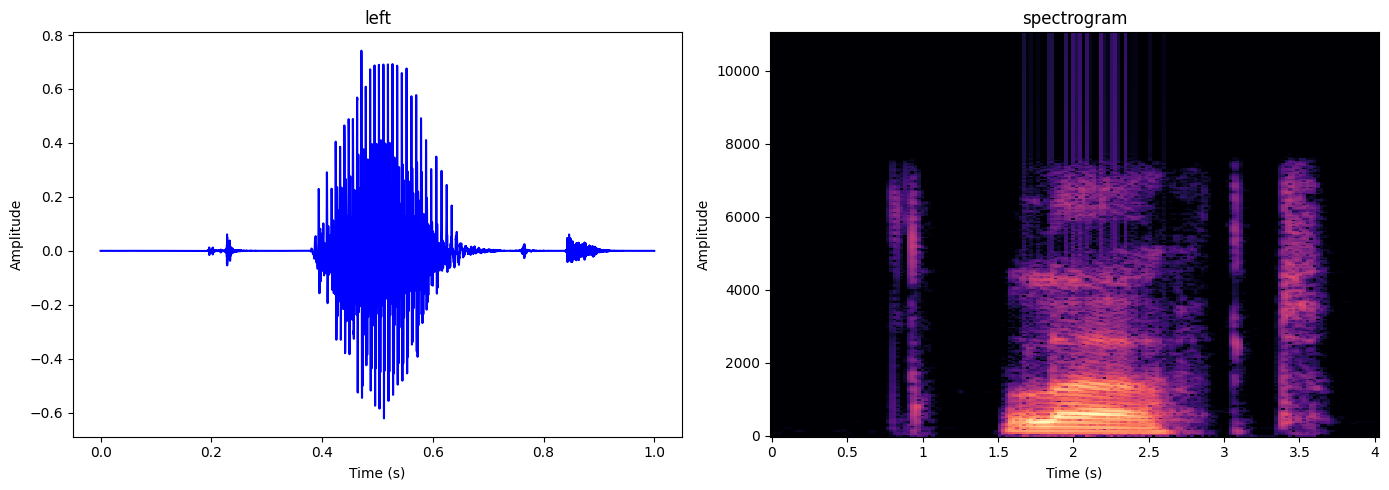

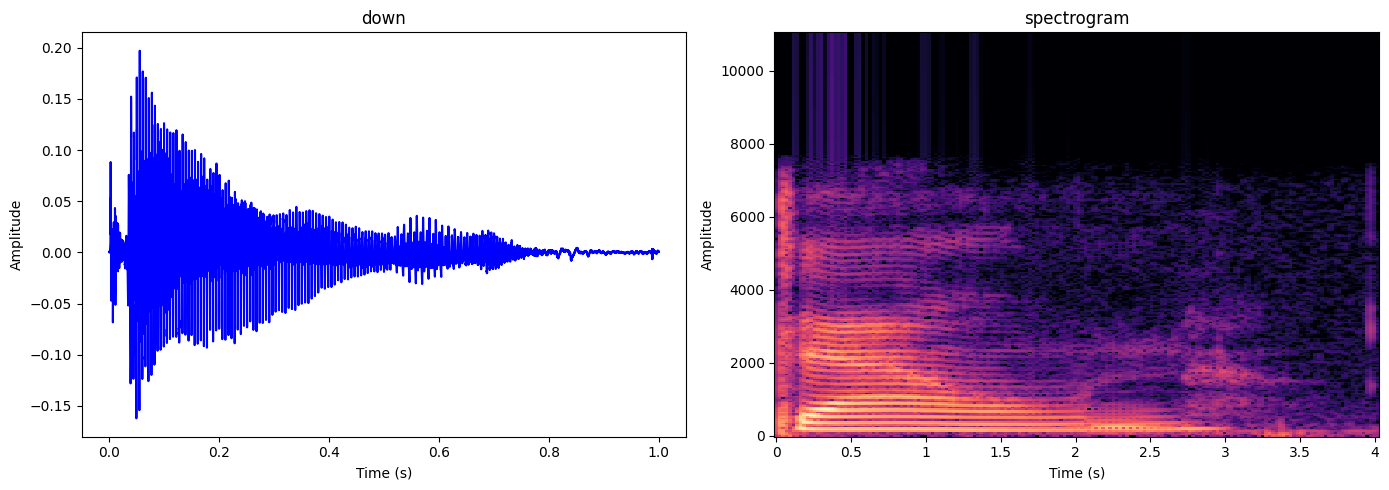

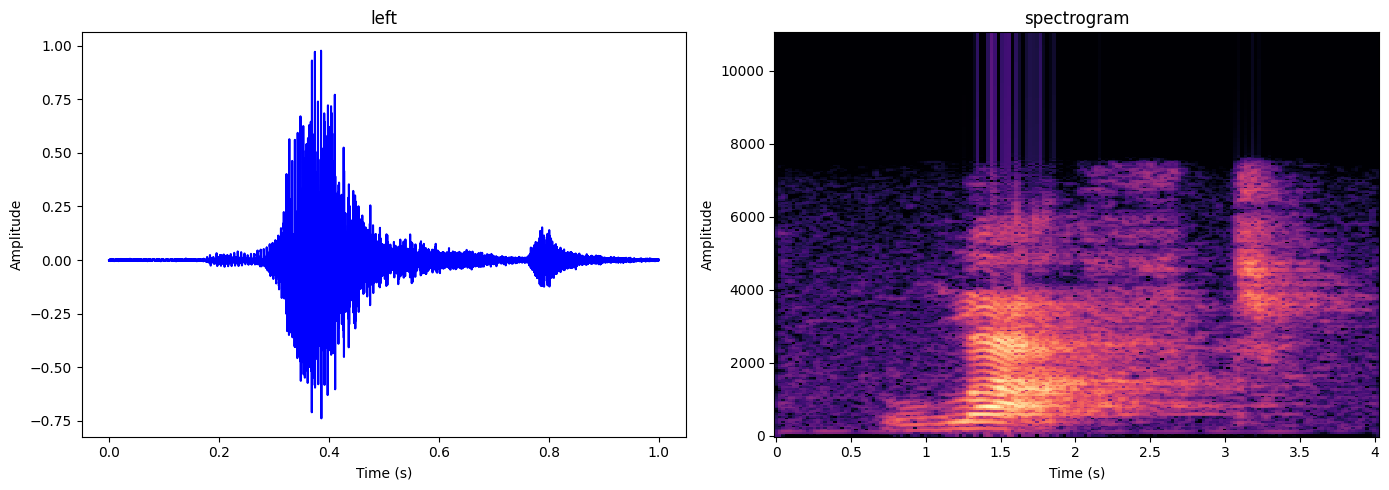

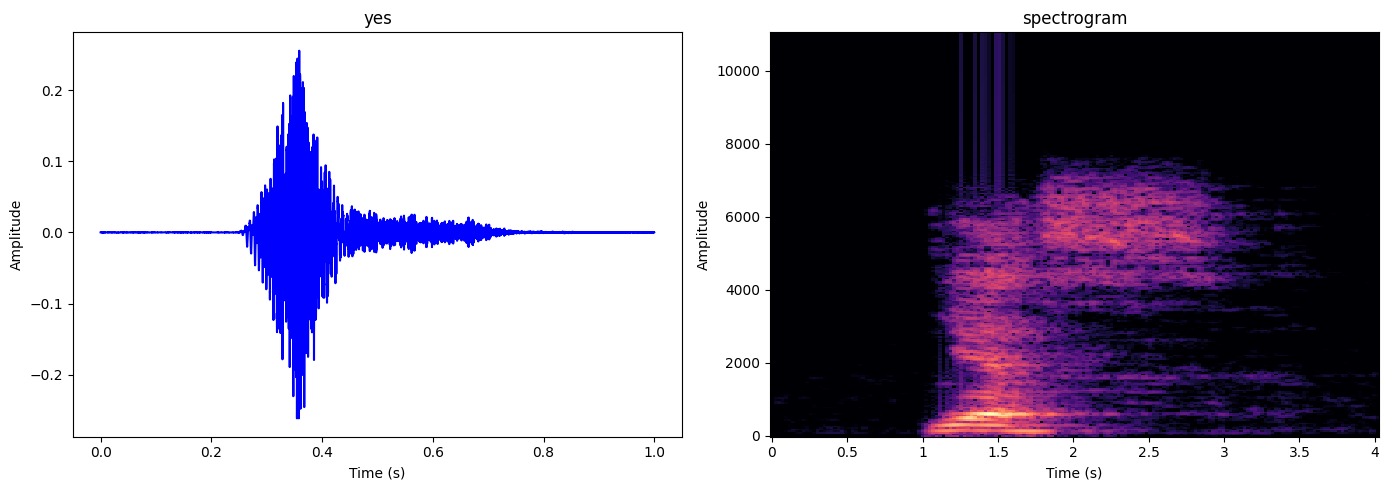

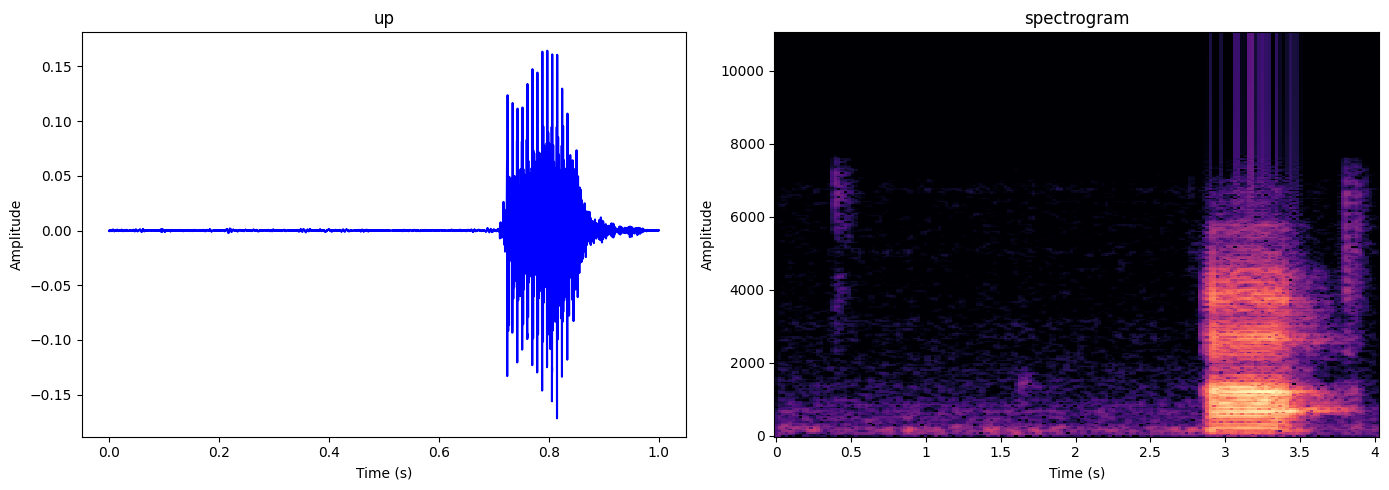

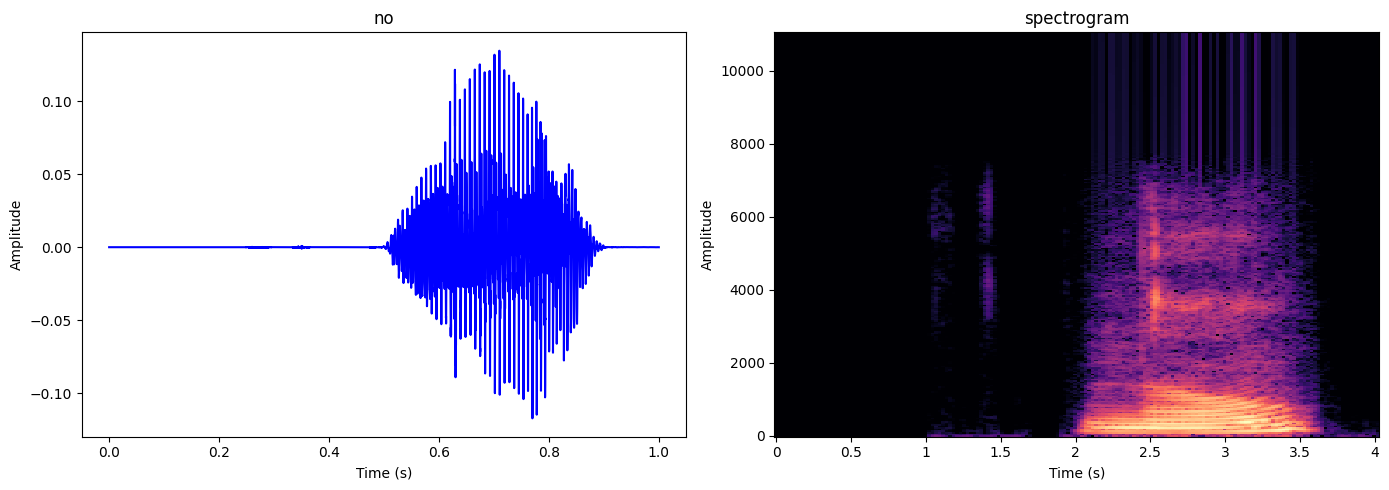

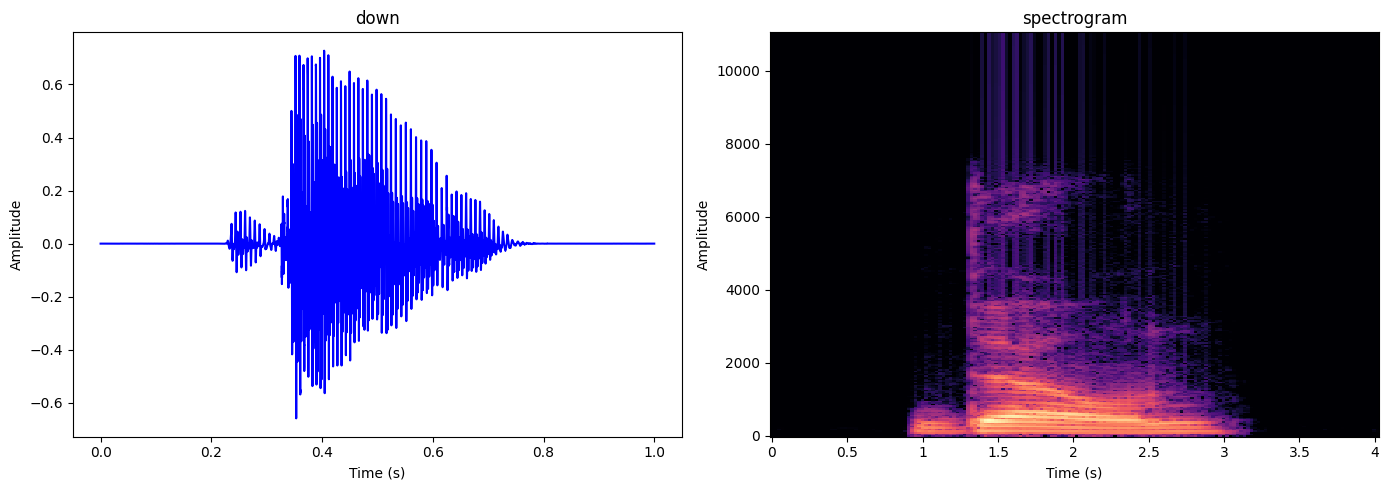

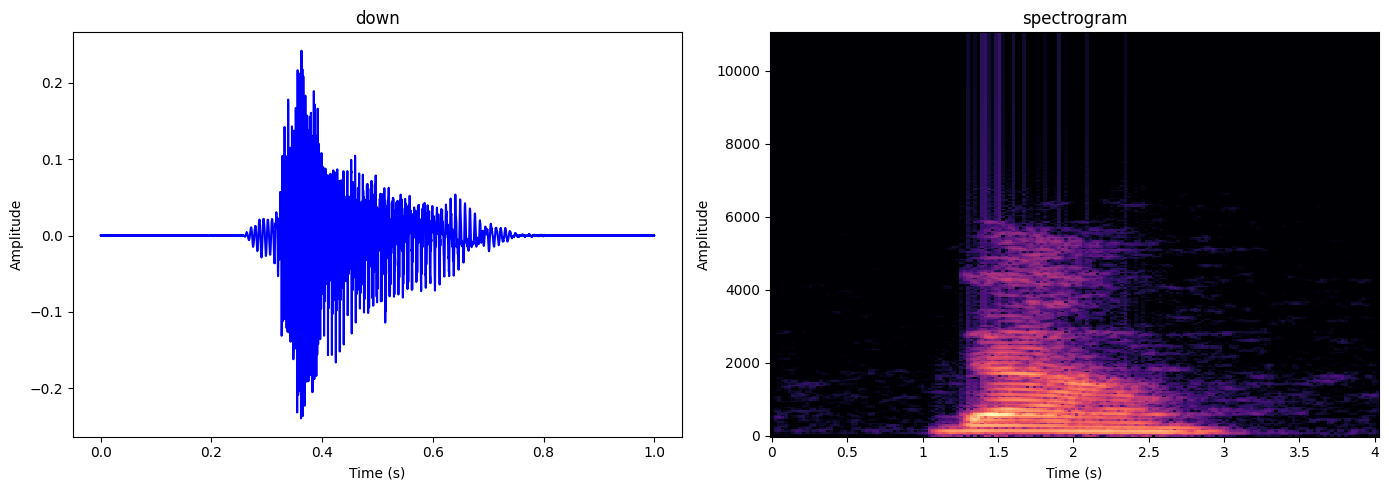

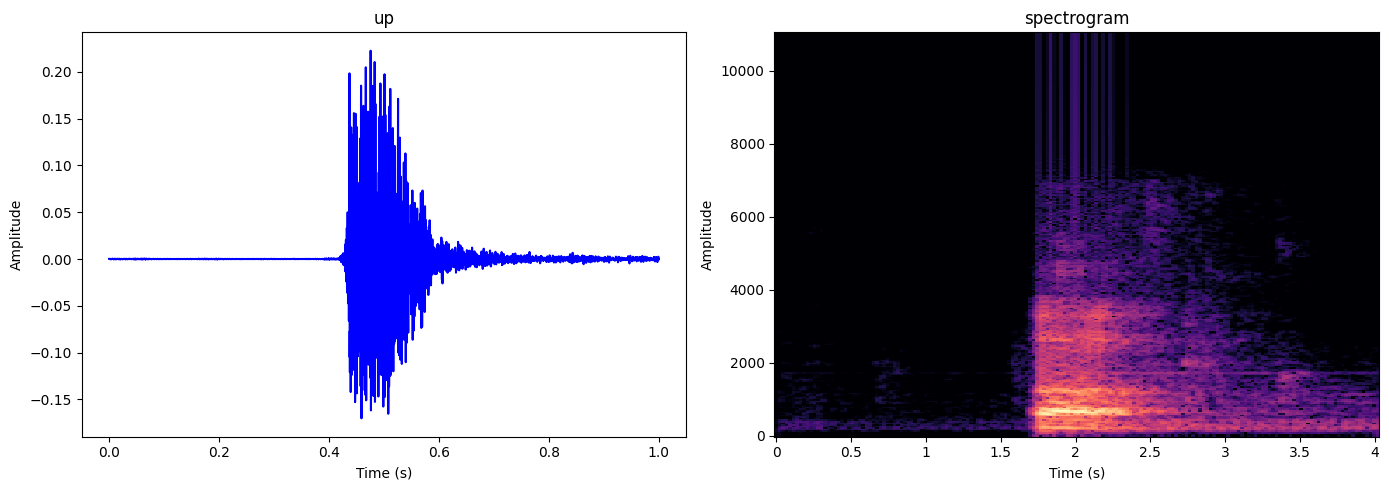

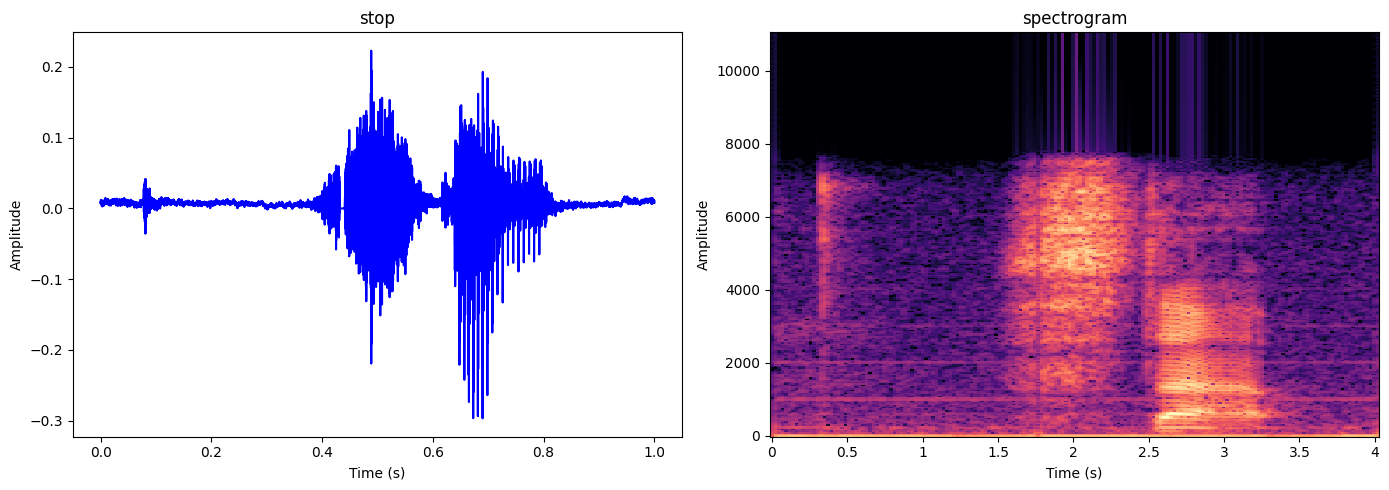

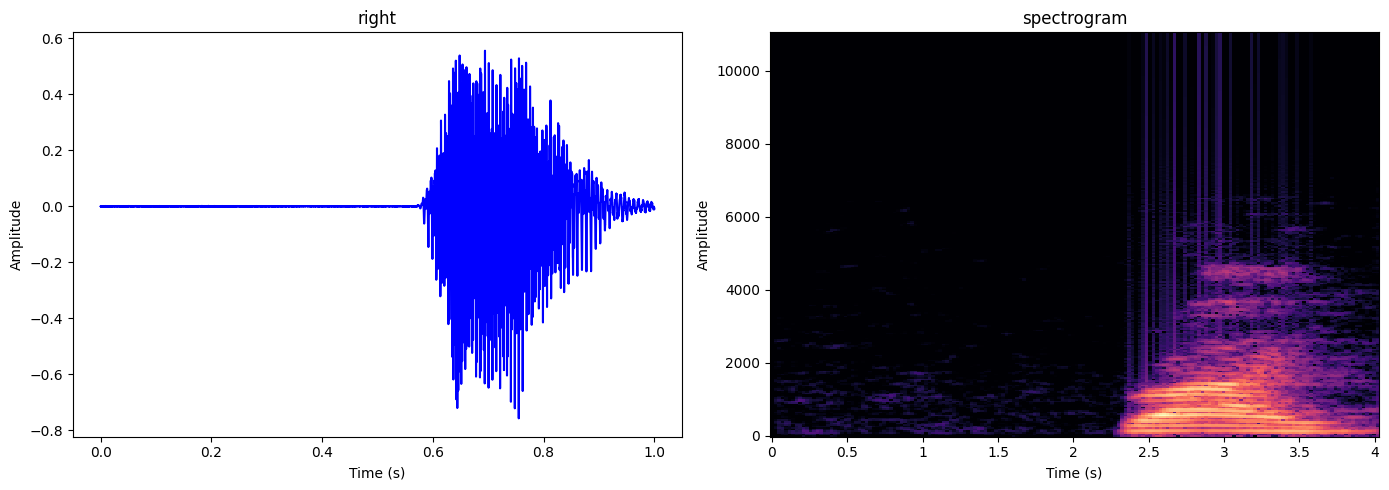

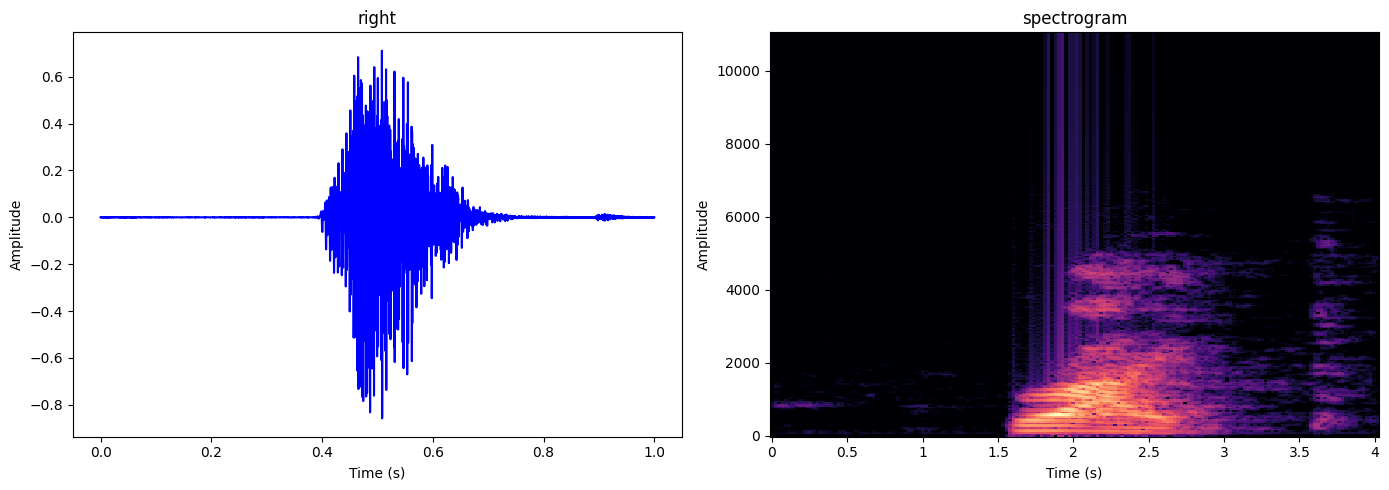

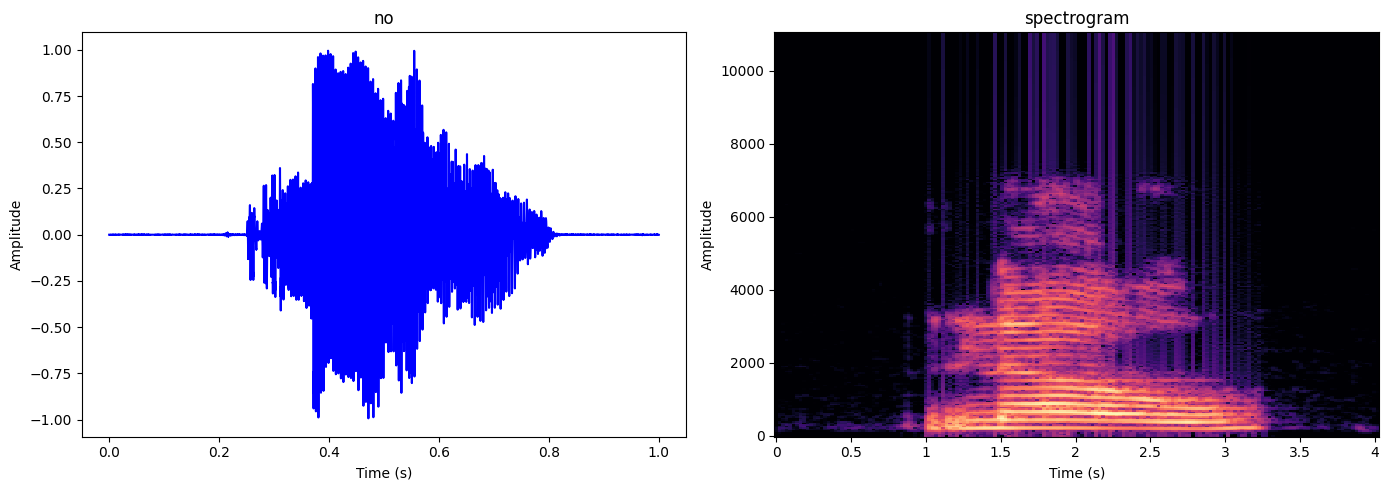

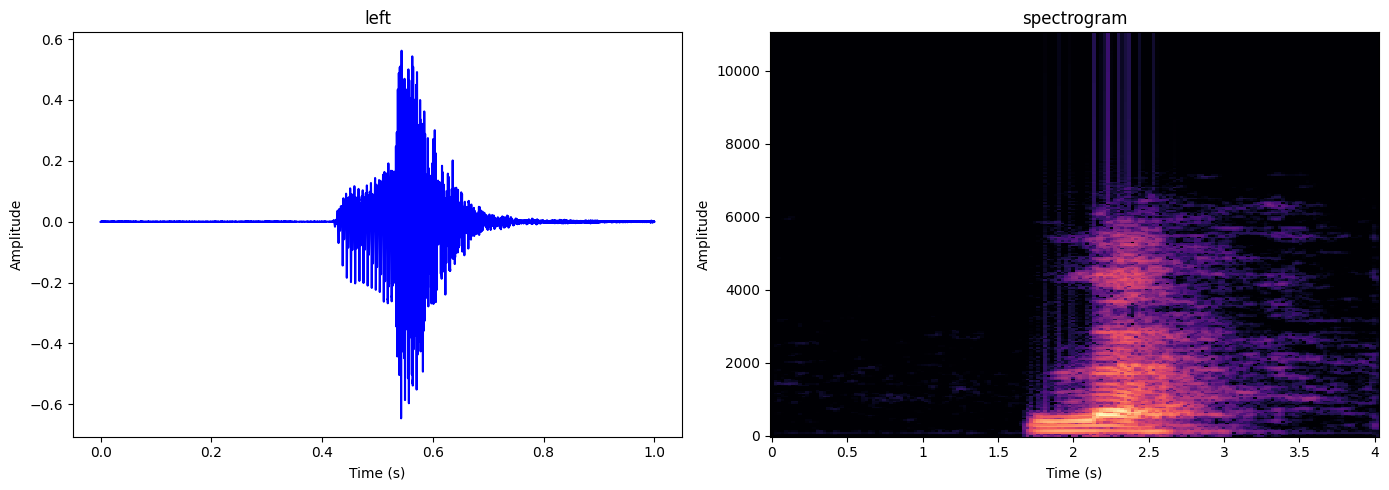

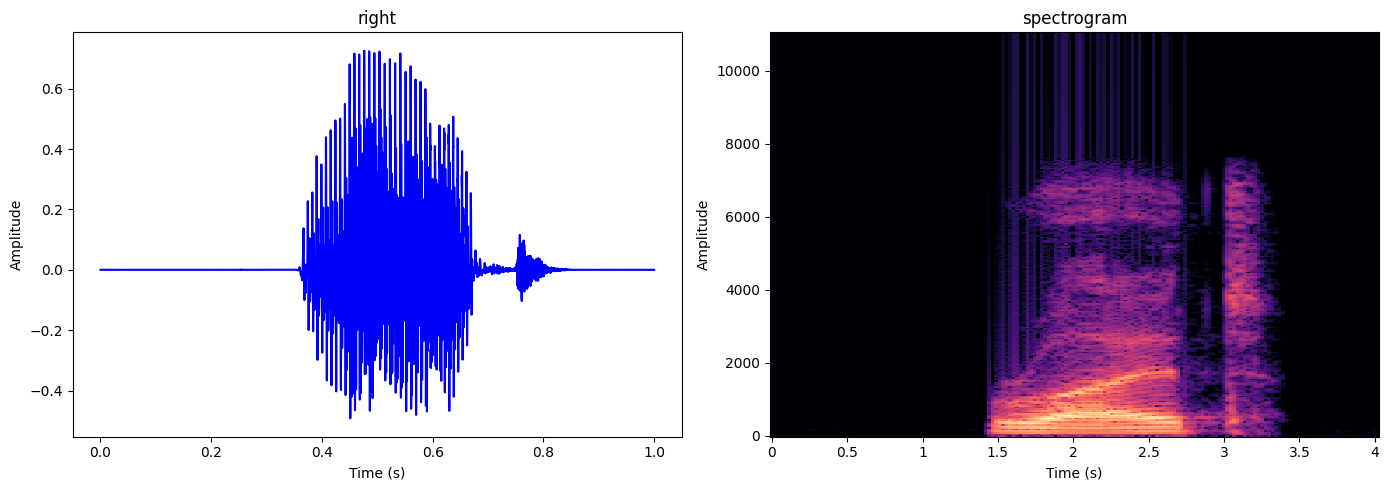

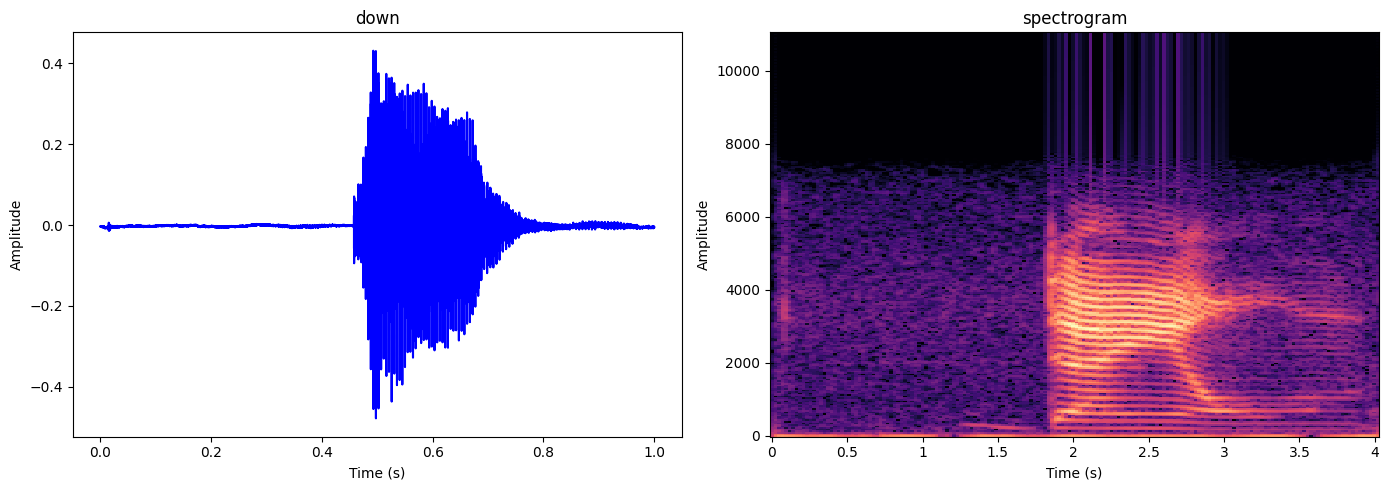

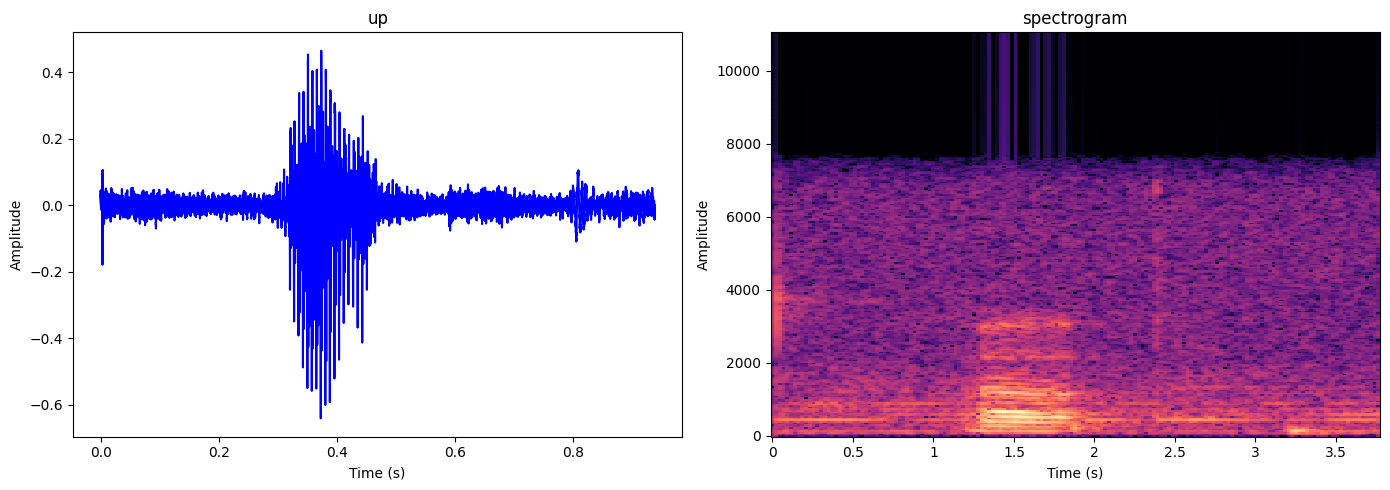

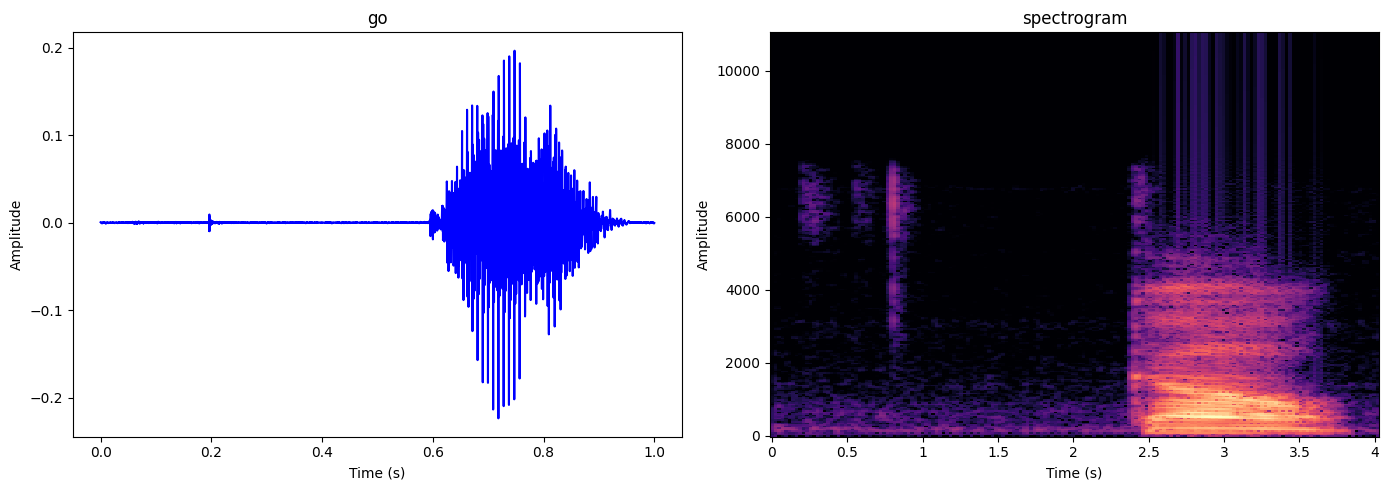

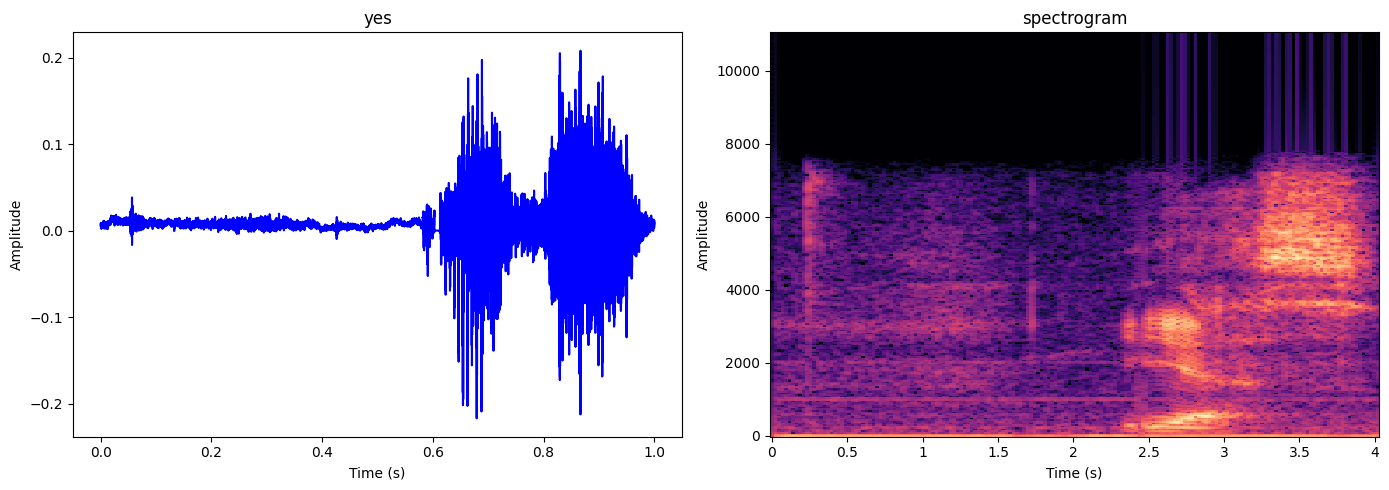

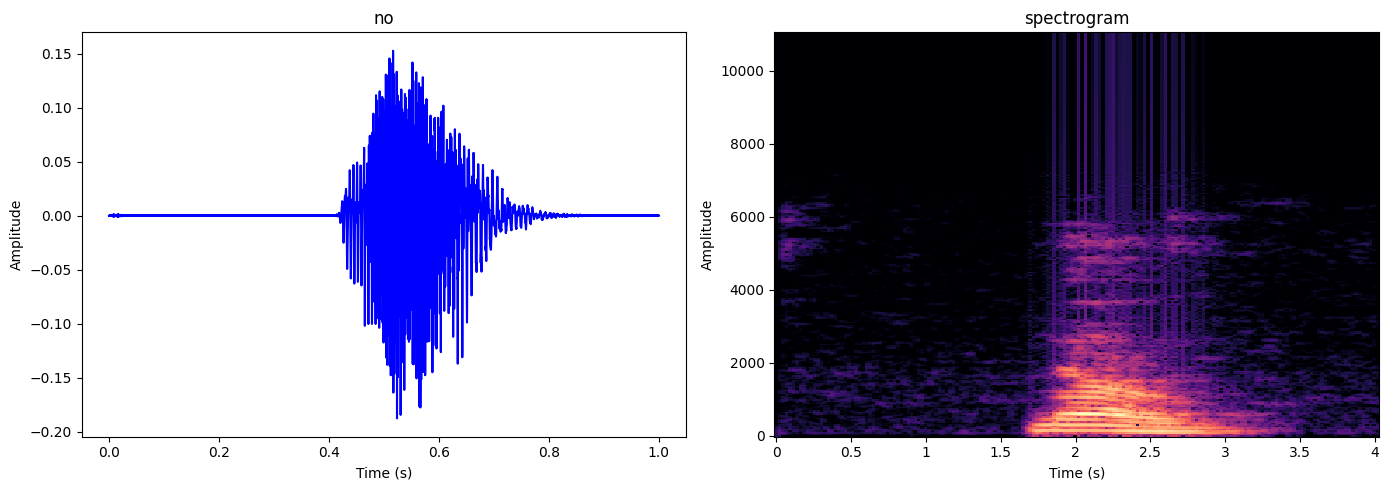

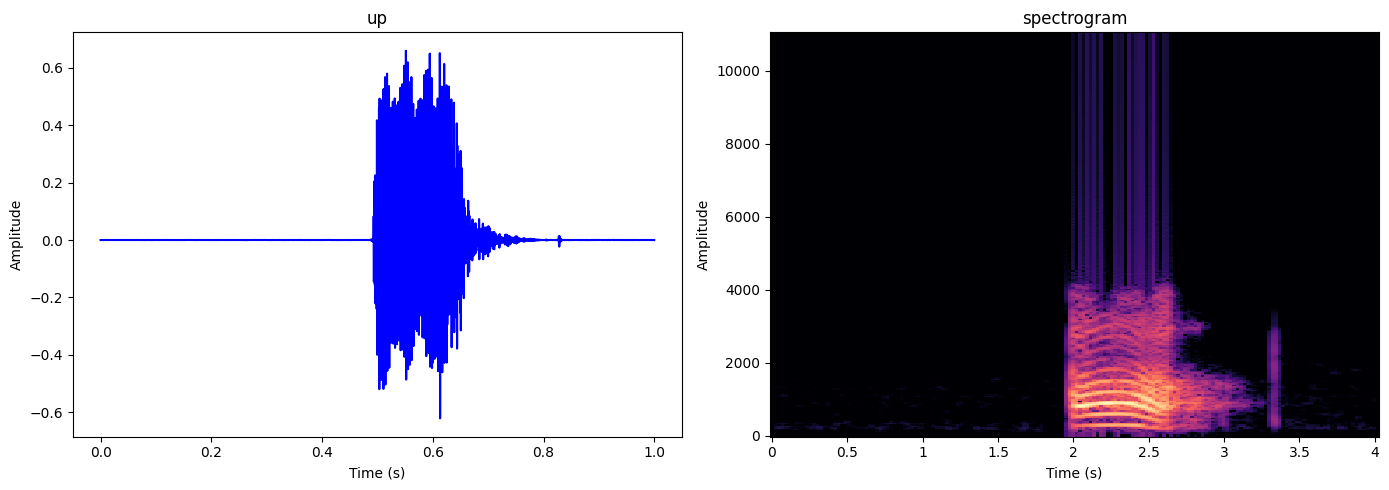

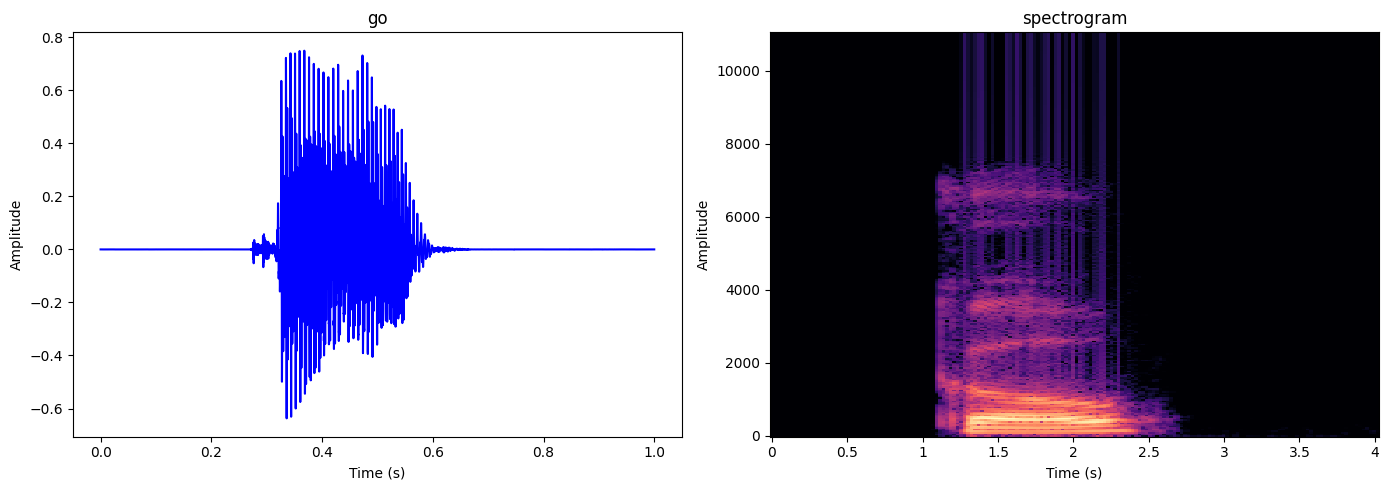

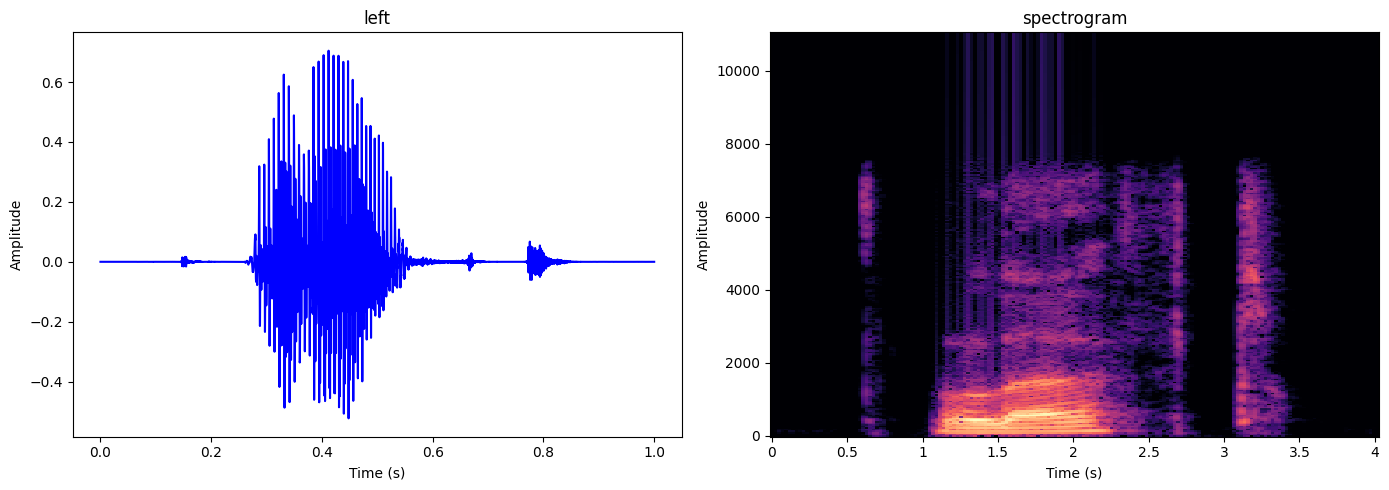

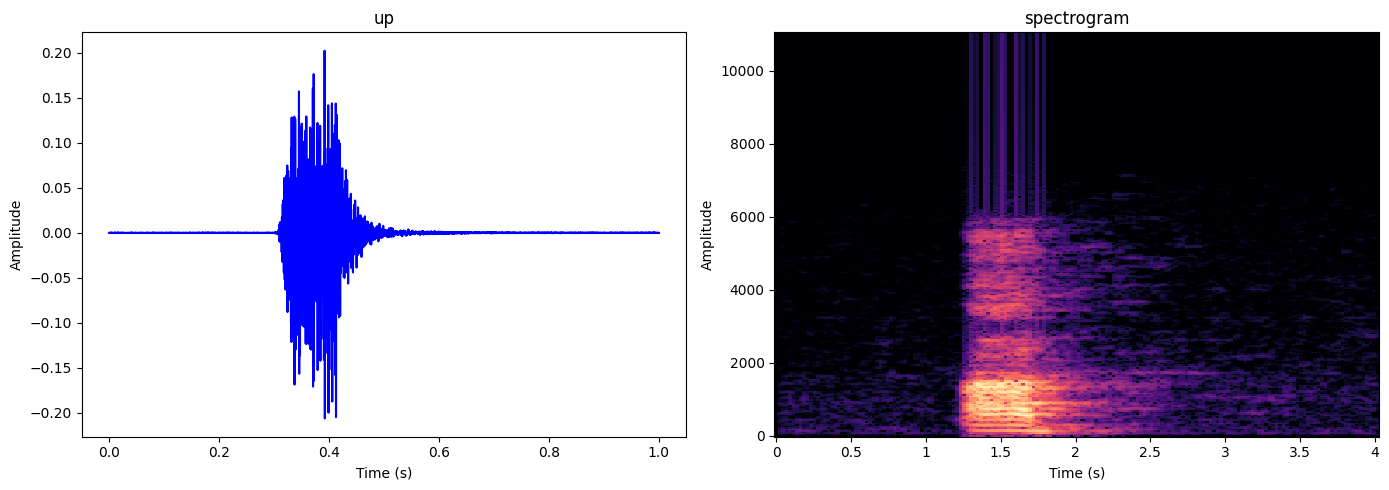

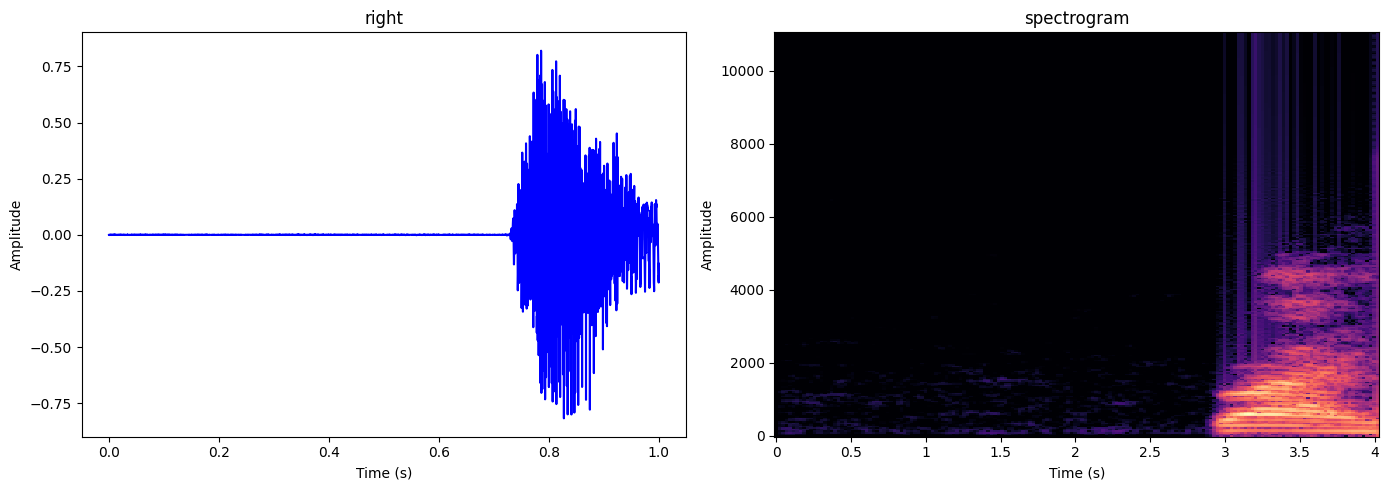

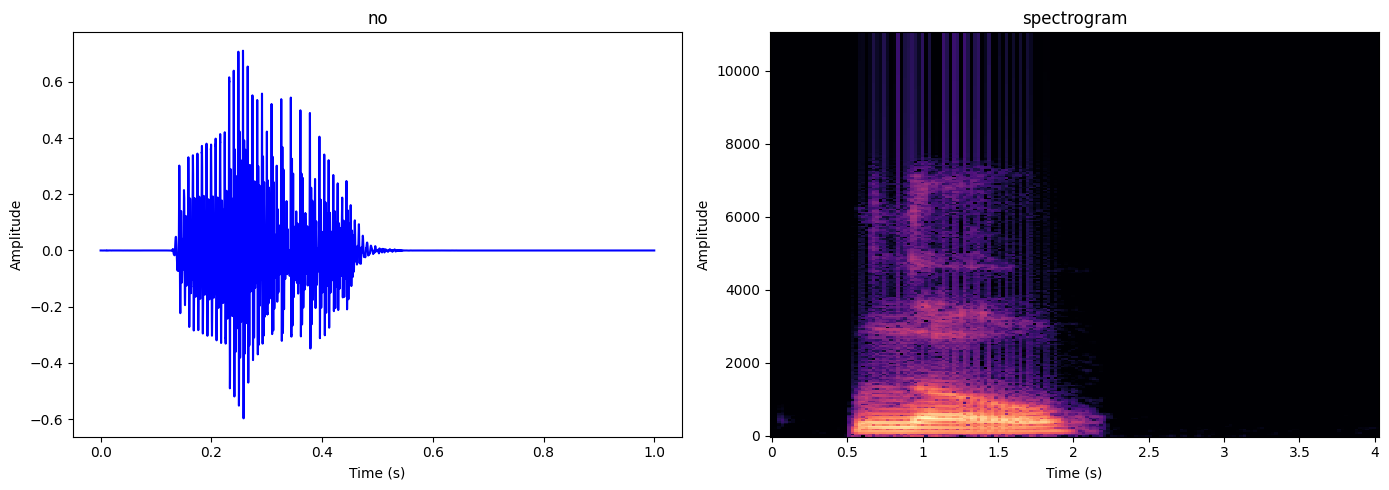

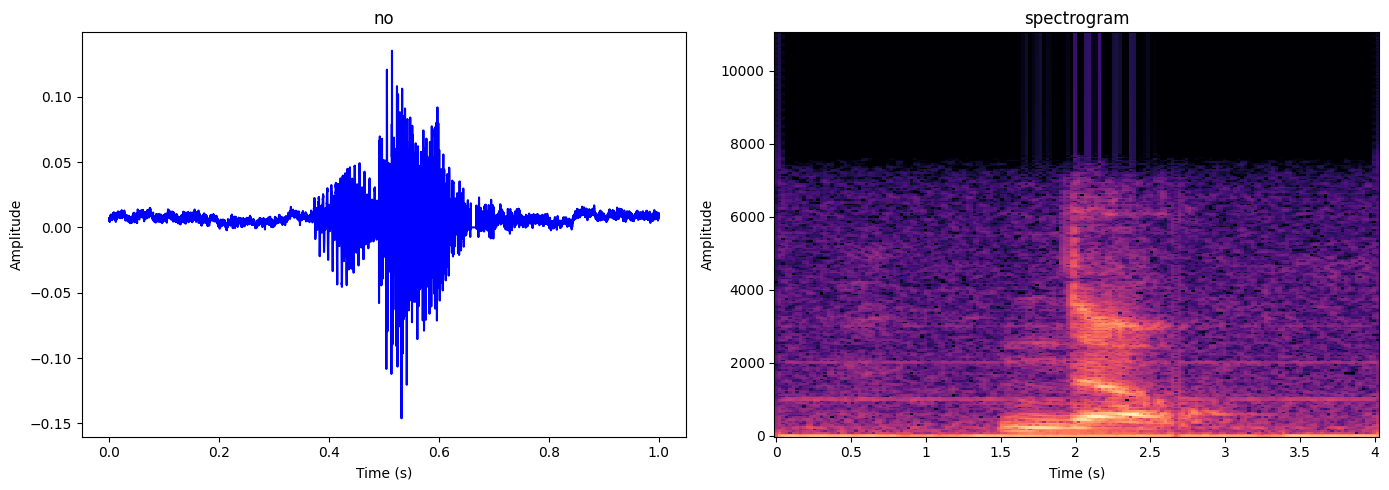

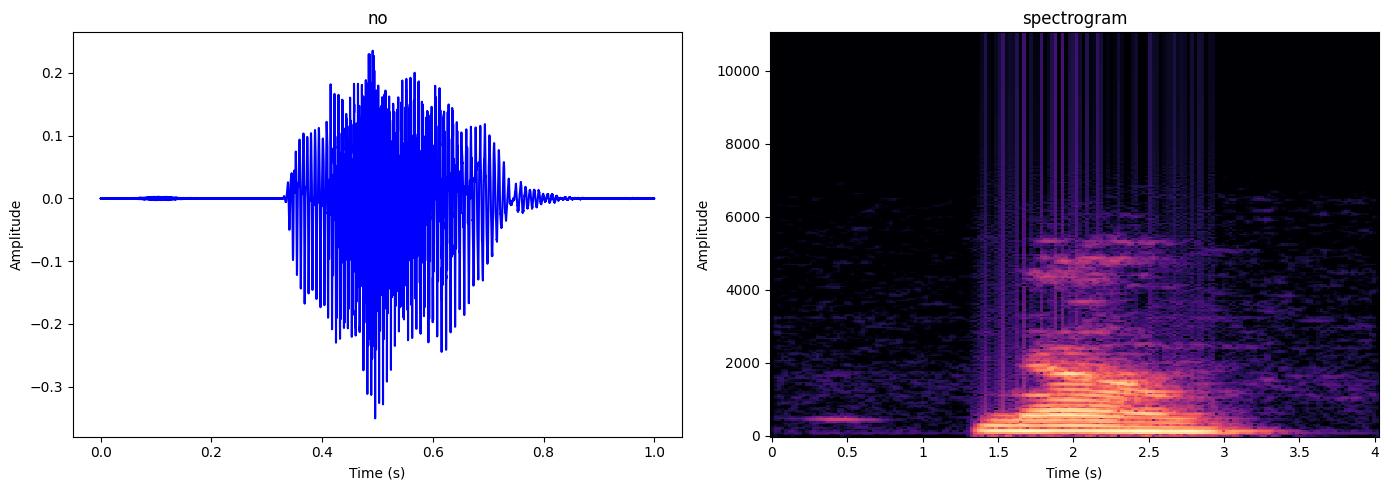

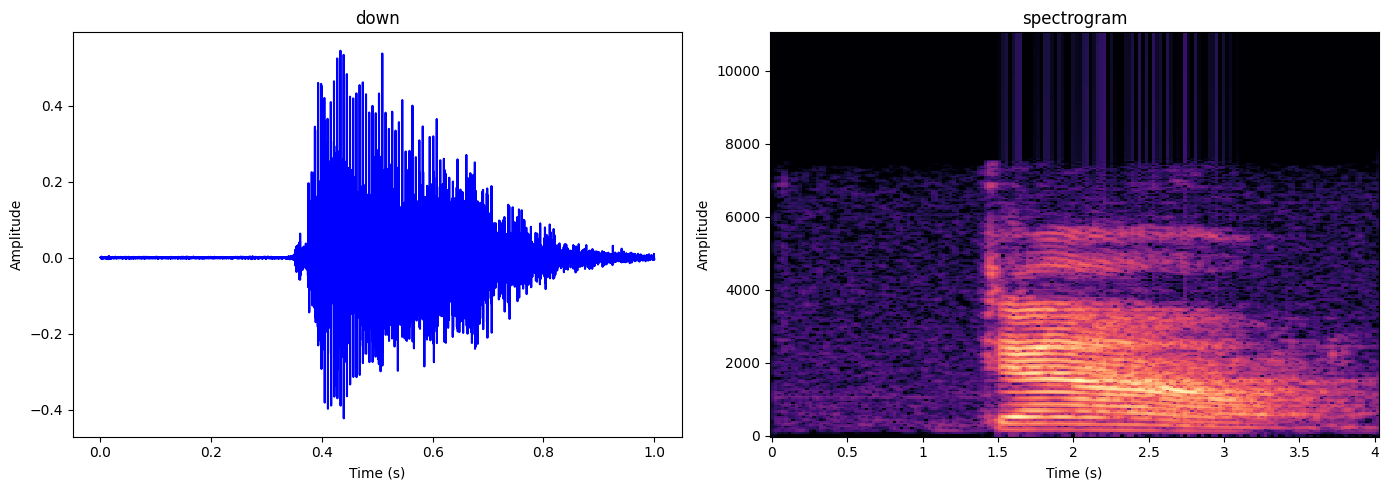

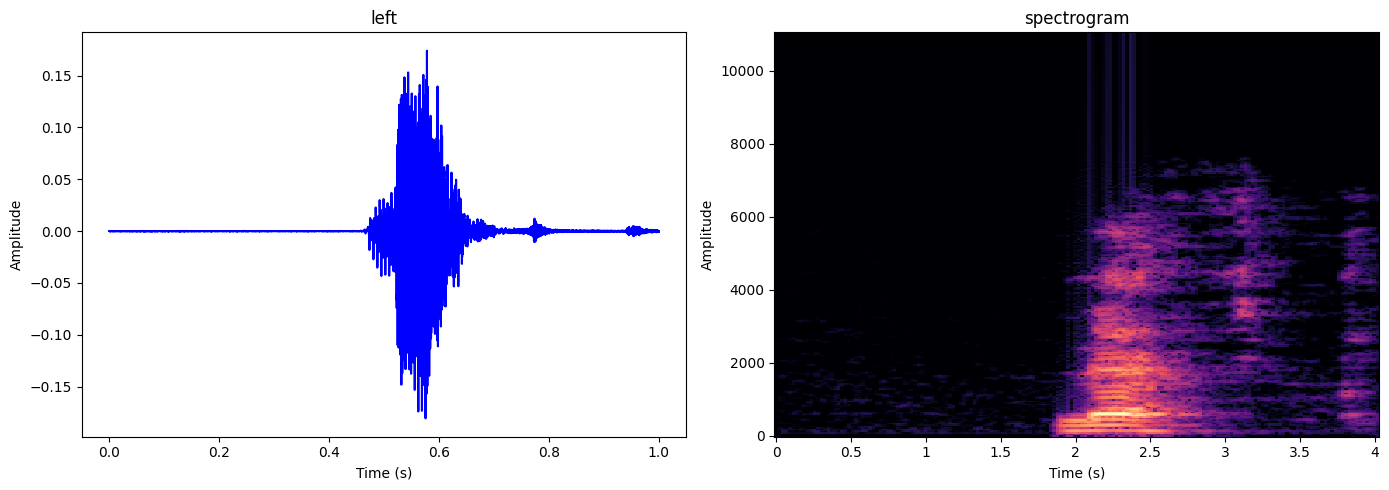

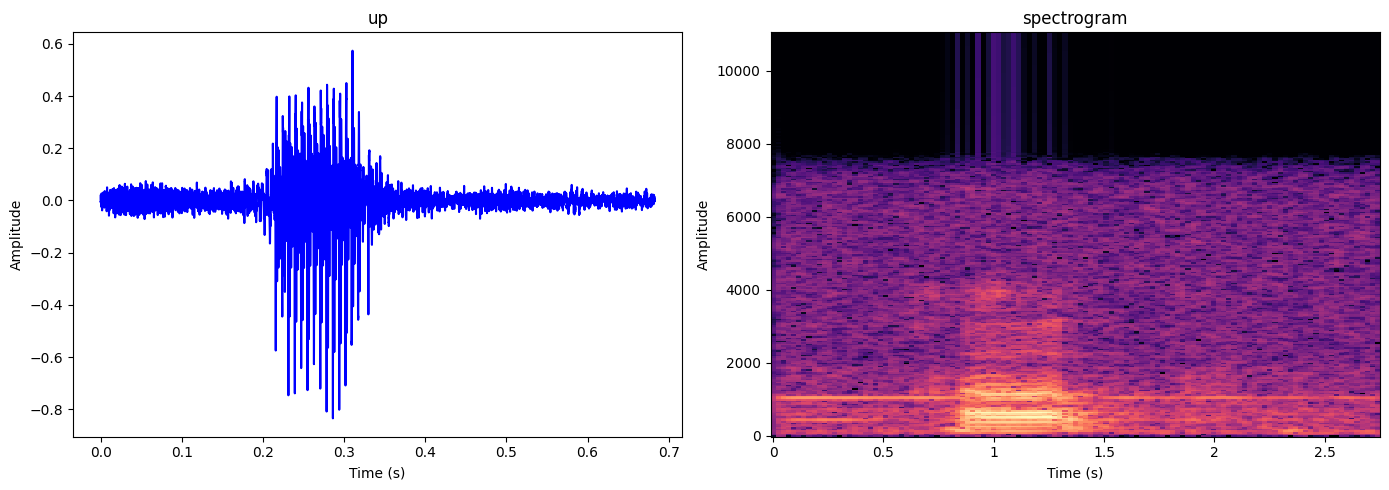

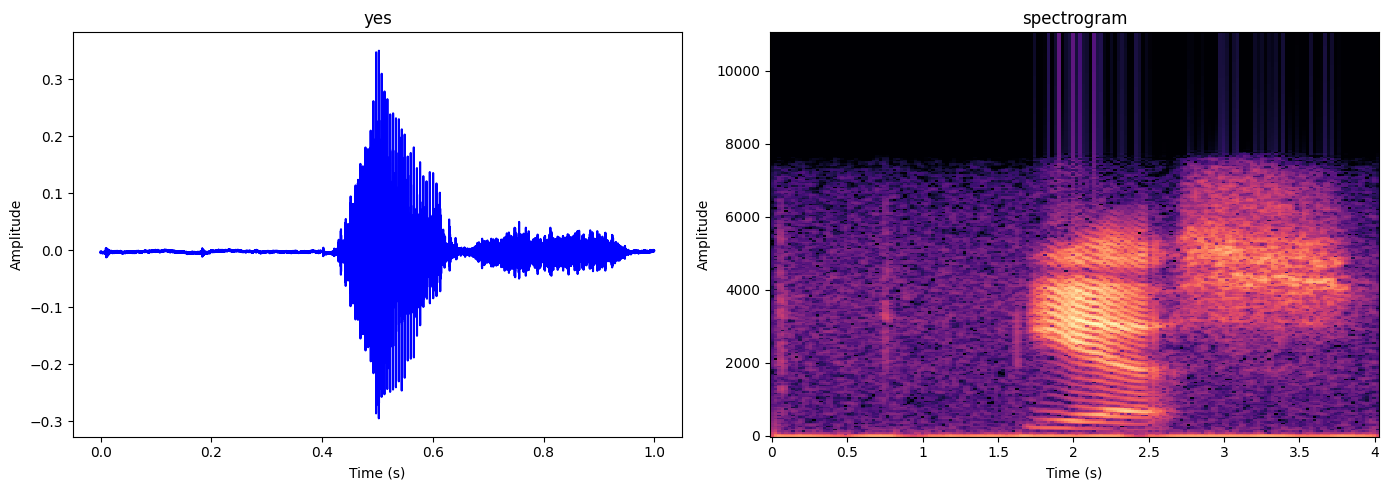

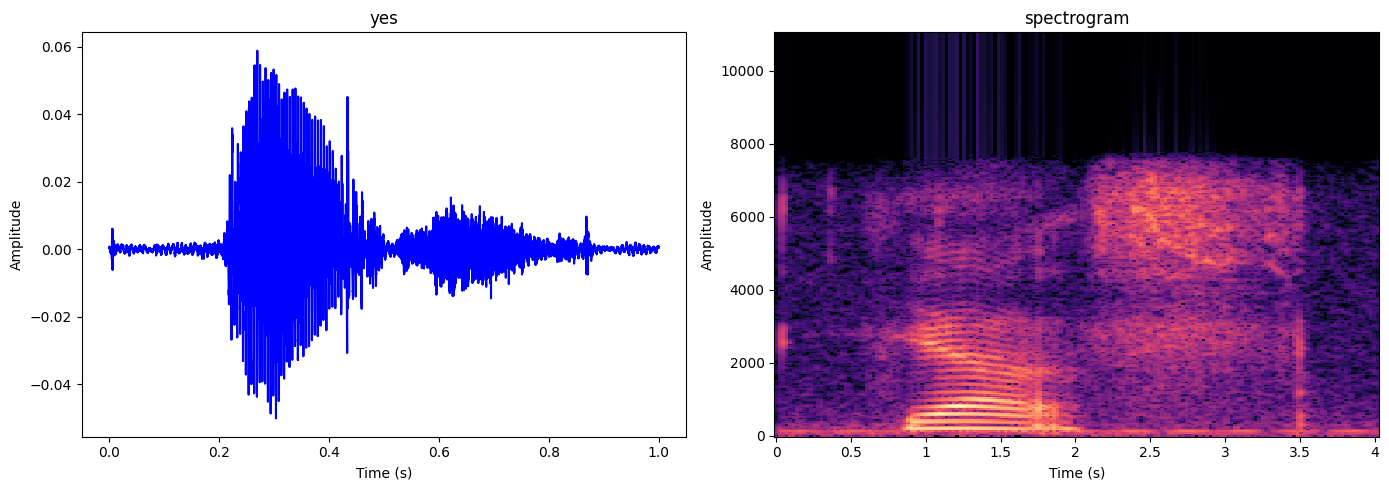

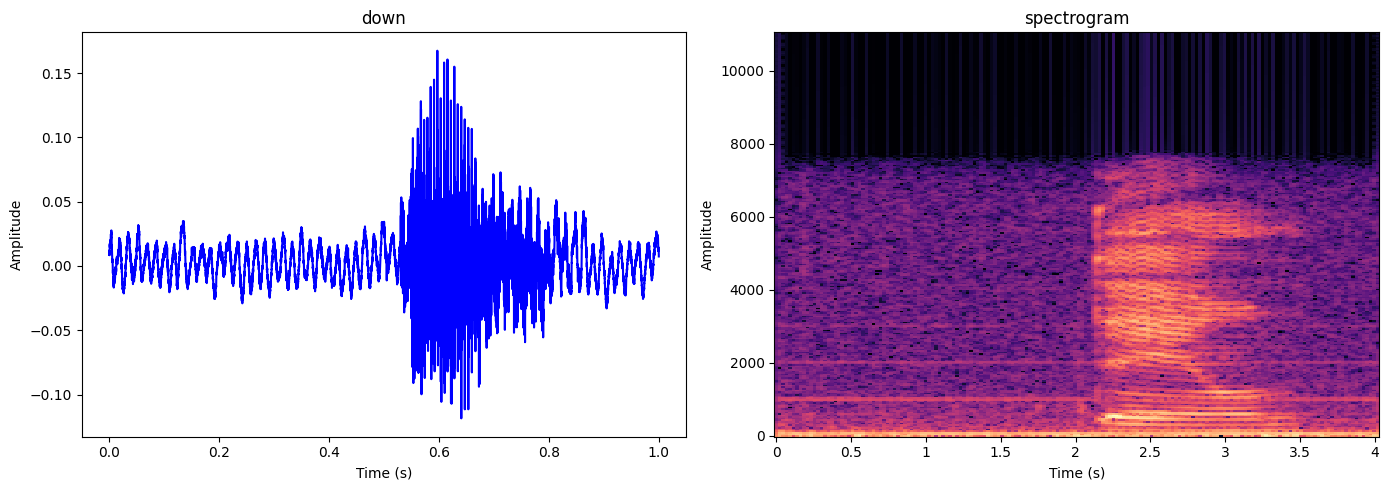

In [14]:
data_set = read_folder()
random.shuffle(data_set)
for data in data_set:
    show(data, y_axis='linear')